# KUIS 1 PEMBELAJARAN MESIN
Klasifikasi SVM Pada Data Citra


# TI 3D - Kelompok 4 - KOPI
- Achmad Raihan Fahrezi Effendy| 2241720192
- Fitriani Novita Maharani     | 2241720235
- M. Rofiq Aulia               | 2241720038
- Muhamad Anang Abdullah Faqih | 2241720070


# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Percobaan 1 - Native SVM without Extraction

Native SVM Train Accuracy: 50.97%
Native SVM Test Accuracy: 29.48%

## Preparation

In [1]:
# Load required library
# Import Required Library
import numpy as np
import cv2
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data


In [2]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True) # Answer number 1 using min 10 face per label

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


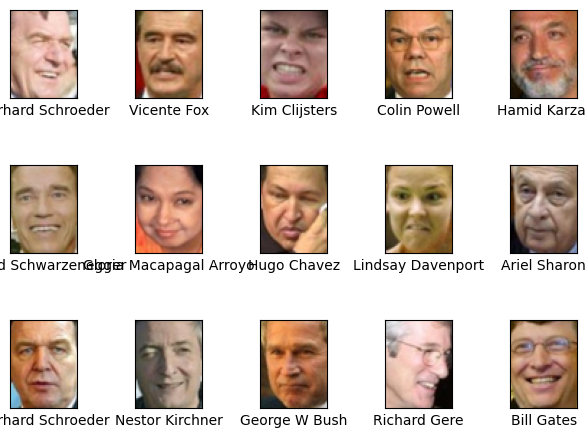

In [3]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

## Preprocessing

In [4]:
# Pada tahap ini, kita melakukan persiapan data sebelum dimasukkan ke dalam model.
X = faces.data # Variabel X merepresentasikan data fitur (pixel image yang sudah di flatten).
y = faces.target # Variabel y merepresentasikan label dari data, yang menunjukkan identitas orang pada masing-masing citra.

In [5]:
# Melihat dimensi atau ukuran dari array
X.shape

(4324, 8742)

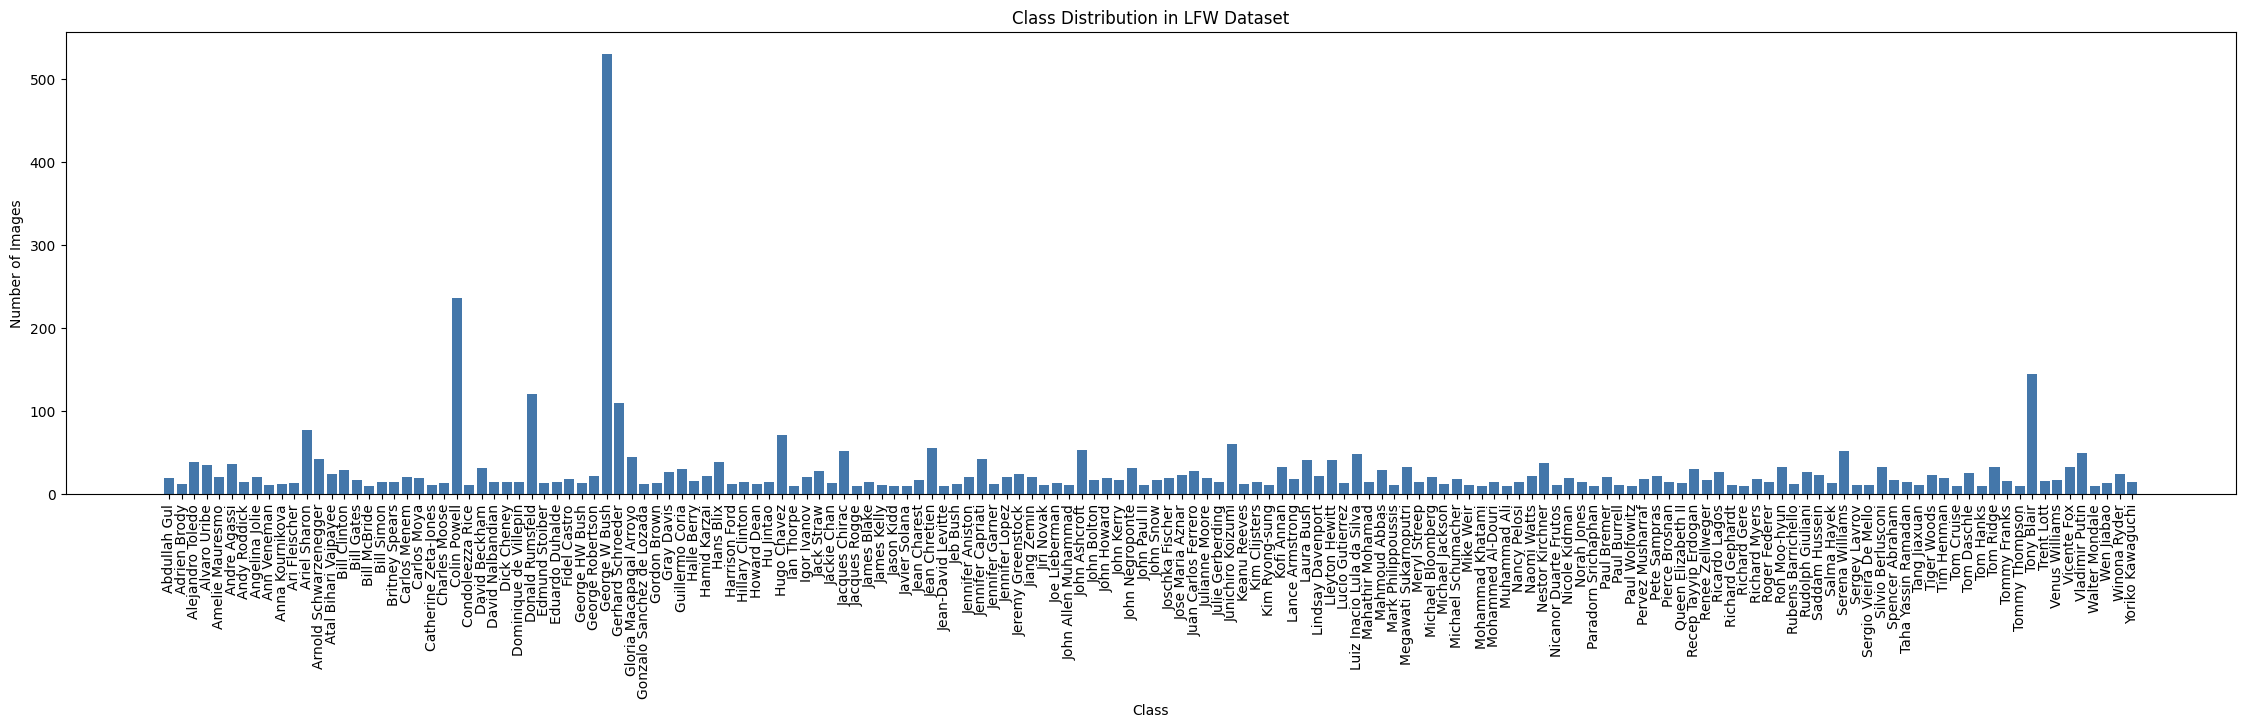

In [6]:
unique, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(28, 6))
plt.bar(faces.target_names[unique], counts, color='#4477AA')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in LFW Dataset')
plt.xticks(rotation=90)
plt.show()

In [7]:
# # Split data into training and testing sets 80% of training and 20% of testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Features Extraction


## Build Model


In [8]:
# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

## Evaluation


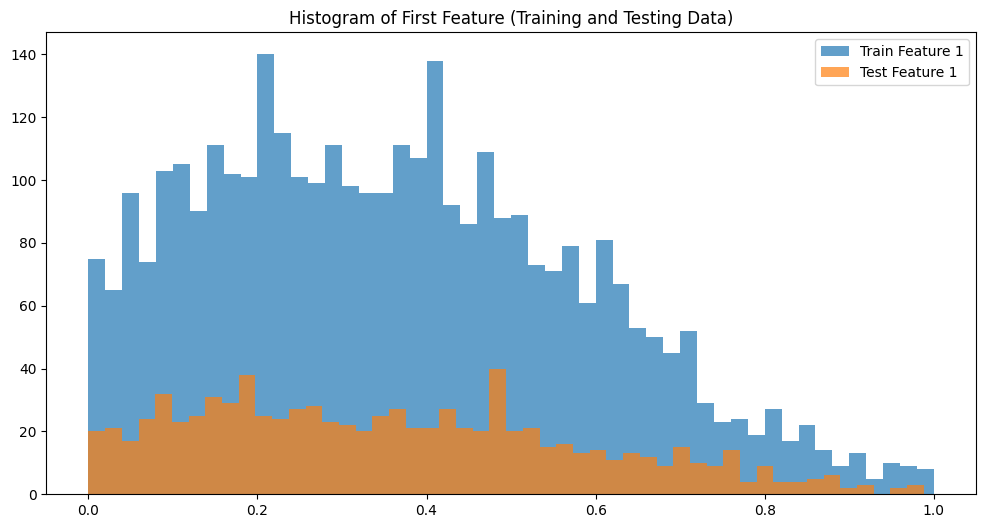

In [9]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.hist(X_train[:, 0], bins=50, alpha=0.7, label='Train Feature 1')
plt.hist(X_test[:, 0], bins=50, alpha=0.7, label='Test Feature 1')
plt.title('Histogram of First Feature (Training and Testing Data)')
plt.legend()
plt.show()



In [10]:
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)


native_svm_train_accuracy = accuracy_score(y_train, y_train_pred)
native_svm_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Native SVM Train Accuracy: {native_svm_train_accuracy * 100:.2f}%')
print(f'Native SVM Test Accuracy: {native_svm_test_accuracy * 100:.2f}%')

Native SVM Train Accuracy: 50.97%
Native SVM Test Accuracy: 29.48%


In [11]:
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred, target_names=faces.target_names))

Classification Report for Training Data:
                           precision    recall  f1-score   support

             Abdullah Gul       1.00      0.14      0.25        14
             Adrien Brody       1.00      0.27      0.43        11
         Alejandro Toledo       0.79      0.70      0.74        37
             Alvaro Uribe       1.00      0.64      0.78        28
          Amelie Mauresmo       0.00      0.00      0.00        15
             Andre Agassi       0.74      0.85      0.79        34
             Andy Roddick       1.00      0.27      0.43        11
           Angelina Jolie       1.00      0.44      0.62        18
              Ann Veneman       0.89      0.80      0.84        10
          Anna Kournikova       1.00      0.45      0.62        11
            Ari Fleischer       0.00      0.00      0.00         9
             Ariel Sharon       0.68      0.63      0.66        62
    Arnold Schwarzenegger       0.00      0.00      0.00        27
     Atal Bihari Vaj

C:\Users\M. Rofiq Aulia\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M. Rofiq Aulia\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M. Rofiq Aulia\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [12]:
print("Classification Report for Testing Data:")
print(classification_report(y_test, y_test_pred, target_names=faces.target_names[:len(np.unique(y_test))], zero_division=0))


Classification Report for Testing Data:
                           precision    recall  f1-score   support

             Abdullah Gul       0.00      0.00      0.00         5
             Adrien Brody       0.00      0.00      0.00         1
         Alejandro Toledo       0.17      0.50      0.25         2
             Alvaro Uribe       0.00      0.00      0.00         7
          Amelie Mauresmo       0.00      0.00      0.00         6
             Andre Agassi       0.00      0.00      0.00         2
             Andy Roddick       0.00      0.00      0.00         4
           Angelina Jolie       0.00      0.00      0.00         2
              Ann Veneman       0.00      0.00      0.00         1
          Anna Kournikova       0.00      0.00      0.00         1
            Ari Fleischer       0.00      0.00      0.00         4
             Ariel Sharon       0.40      0.13      0.20        15
    Arnold Schwarzenegger       0.00      0.00      0.00        15
     Atal Bihari Vajp

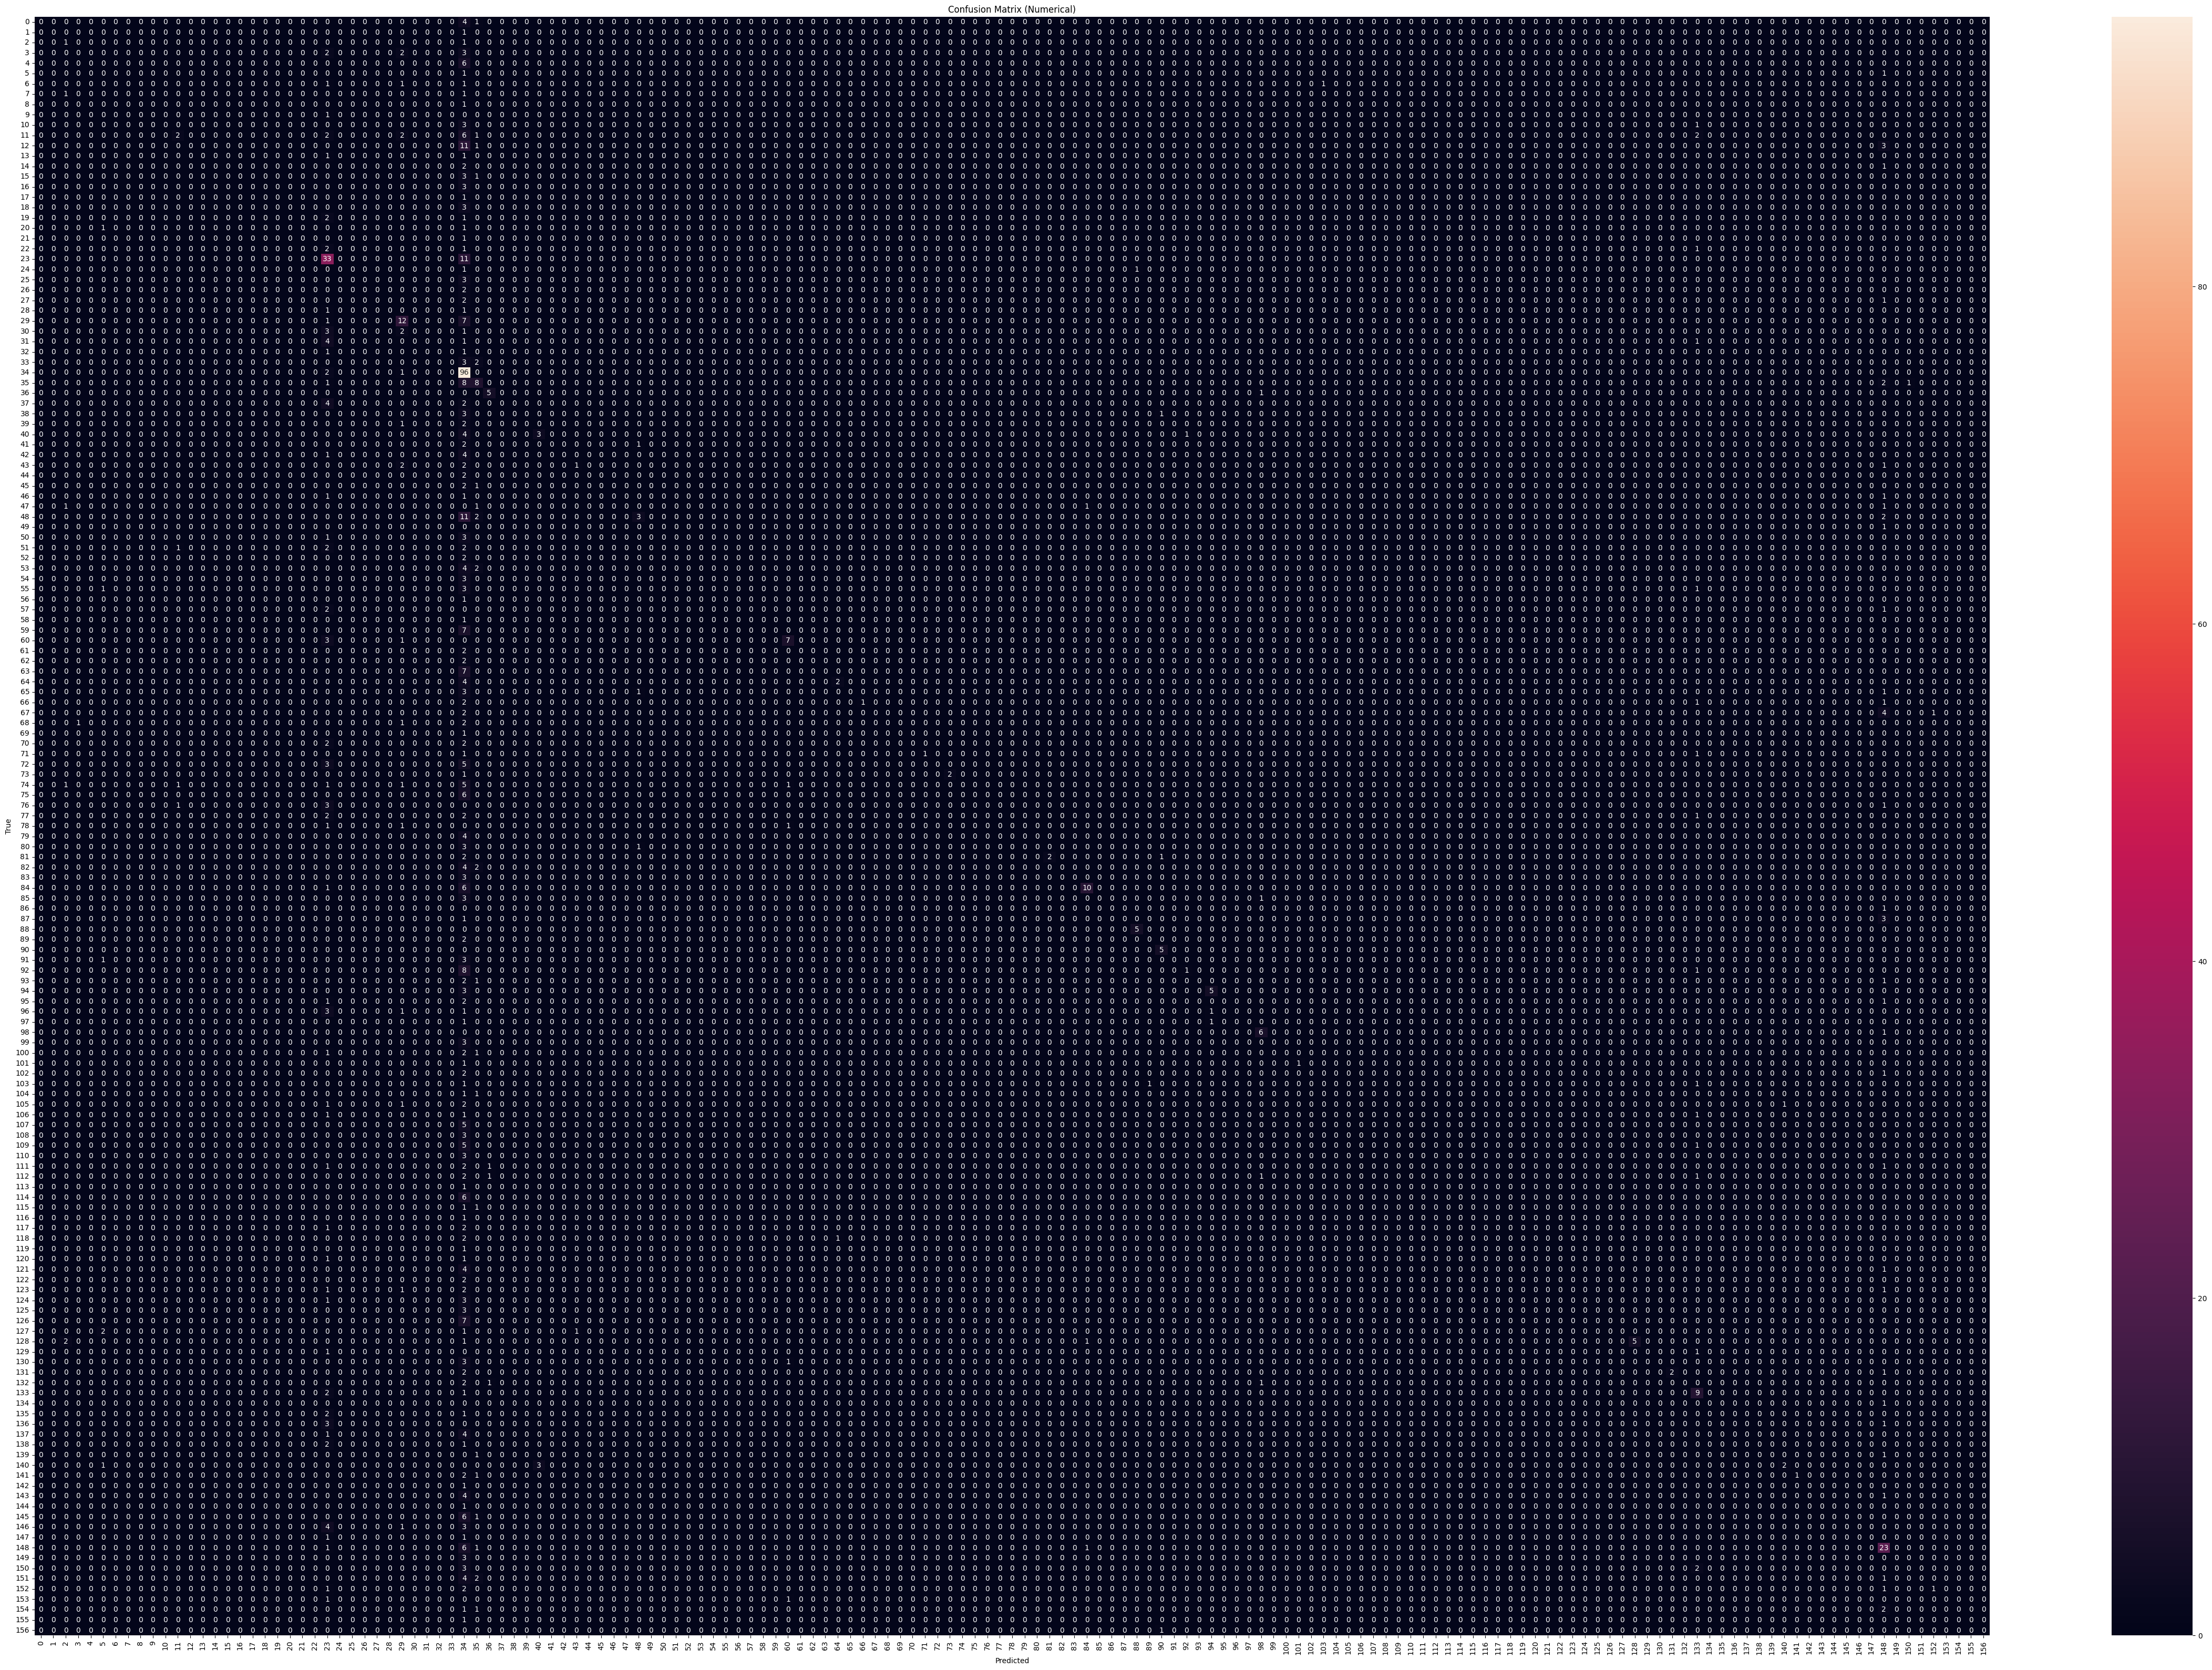

In [13]:
# prompt: buat visualize conffusion matrix number

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and y_pred from your model
cm = confusion_matrix(y_test, y_test_pred)

# Visualize the confusion matrix with numbers
plt.figure(figsize=(60, 40))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Numerical)")
plt.show()


In [14]:
# Show all target name of face
print(faces.target_names)

['Abdullah Gul' 'Adrien Brody' 'Alejandro Toledo' 'Alvaro Uribe'
 'Amelie Mauresmo' 'Andre Agassi' 'Andy Roddick' 'Angelina Jolie'
 'Ann Veneman' 'Anna Kournikova' 'Ari Fleischer' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Atal Bihari Vajpayee' 'Bill Clinton'
 'Bill Gates' 'Bill McBride' 'Bill Simon' 'Britney Spears' 'Carlos Menem'
 'Carlos Moya' 'Catherine Zeta-Jones' 'Charles Moose' 'Colin Powell'
 'Condoleezza Rice' 'David Beckham' 'David Nalbandian' 'Dick Cheney'
 'Dominique de Villepin' 'Donald Rumsfeld' 'Edmund Stoiber'
 'Eduardo Duhalde' 'Fidel Castro' 'George HW Bush' 'George Robertson'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Gonzalo Sanchez de Lozada' 'Gordon Brown' 'Gray Davis' 'Guillermo Coria'
 'Halle Berry' 'Hamid Karzai' 'Hans Blix' 'Harrison Ford'
 'Hillary Clinton' 'Howard Dean' 'Hu Jintao' 'Hugo Chavez' 'Ian Thorpe'
 'Igor Ivanov' 'Jack Straw' 'Jackie Chan' 'Jacques Chirac' 'Jacques Rogge'
 'James Blake' 'James Kelly' 'Jason Kidd' 'Javier Solana'

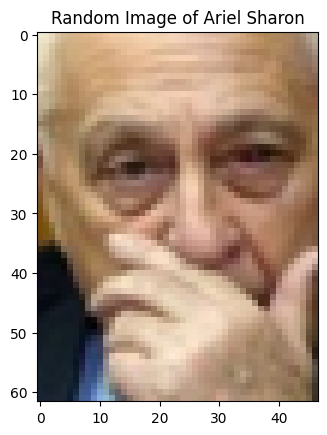

Predicted person: Donald Rumsfeld


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random
# Assuming 'faces' is your loaded dataset and 'svm_model' is your trained SVM model

# Define the person's name
person_name = 'Ariel Sharon'

# Get all indices of images that belong to the specified person
person_index = np.where(faces.target_names == person_name)[0][0]  # Get the index of the person in target_names
person_image_indices = np.where(faces.target == person_index)[0]  # Get indices of all images for the person

# Select a random image index from the person's available images
random_image_index = random.choice(person_image_indices)

# Display the randomly selected image
plt.imshow(faces.images[random_image_index], cmap='gray')
plt.title(f"Random Image of {person_name}")
plt.show()

# Flatten the selected image (assuming the model was trained on flattened images)
selected_image_flattened = faces.images[random_image_index].flatten().reshape(1, -1)

# Predict using your trained SVM model
prediction = svm_model.predict(selected_image_flattened)

# Get the predicted person's name from the target_names array
predicted_person_name = faces.target_names[prediction[0]]

print(f"Predicted person: {predicted_person_name}")


# Percobaan 2 - Native SVM without Ekstraction + Standard Scaller

Native SVM with STD Scaler Train Accuracy: 66.26%
Native SVM with STD Scaler Test Accuracy: 31.45%

## Preparation

In [16]:
# Load required library
# Import Required Library
import numpy as np
import cv2
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Load Data


In [17]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True) # Answer number 1 using min 10 face per label

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


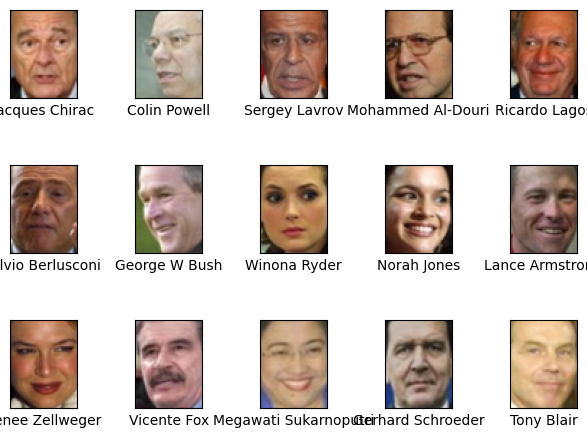

In [18]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

## Preprocessing

In [19]:
# Pada tahap ini, kita melakukan persiapan data sebelum dimasukkan ke dalam model.
X = faces.data # Variabel X merepresentasikan data fitur (pixel image yang sudah di flatten).
y = faces.target # Variabel y merepresentasikan label dari data, yang menunjukkan identitas orang pada masing-masing citra.

In [20]:
# Melihat dimensi atau ukuran dari array
X.shape

(4324, 8742)

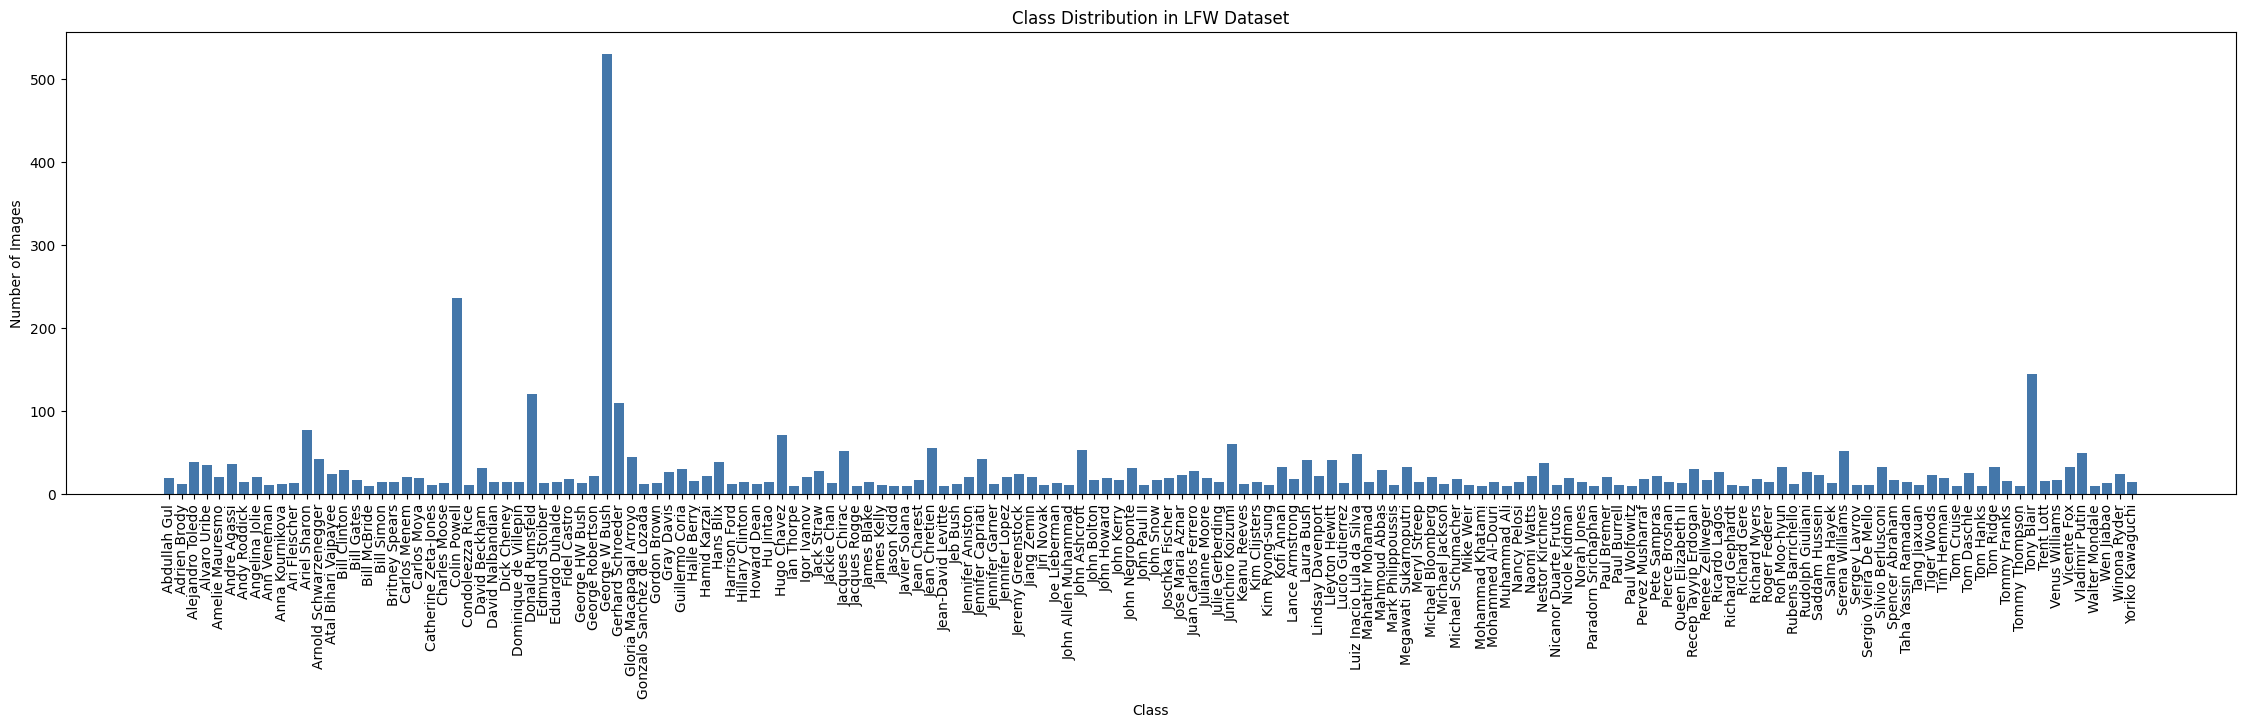

In [21]:
unique, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(28, 6))
plt.bar(faces.target_names[unique], counts, color='#4477AA')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in LFW Dataset')
plt.xticks(rotation=90)
plt.show()

In [22]:
# # Split data into training and testing sets 80% of training and 20% of testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Features Extraction


## Build Model


In [24]:
# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

## Evaluation


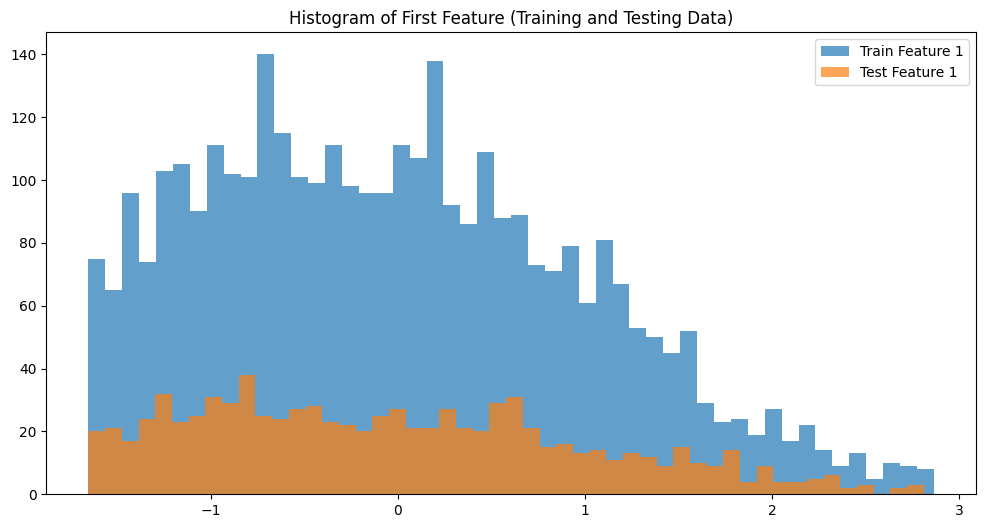

In [25]:
plt.figure(figsize=(12, 6))
plt.hist(X_train[:, 0], bins=50, alpha=0.7, label='Train Feature 1')
plt.hist(X_test[:, 0], bins=50, alpha=0.7, label='Test Feature 1')
plt.title('Histogram of First Feature (Training and Testing Data)')
plt.legend()
plt.show()

In [26]:
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

native_svm_std_train_accuracy = accuracy_score(y_train, y_train_pred)
native_svm_std_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Native SVM with STD Scaler Train Accuracy: {native_svm_std_train_accuracy * 100:.2f}%')
print(f'Native SVM with STD Scaler Test Accuracy: {native_svm_std_test_accuracy * 100:.2f}%')

Native SVM with STD Scaler Train Accuracy: 66.26%
Native SVM with STD Scaler Test Accuracy: 31.45%


In [27]:
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred, target_names=faces.target_names))

Classification Report for Training Data:
                           precision    recall  f1-score   support

             Abdullah Gul       1.00      0.64      0.78        14
             Adrien Brody       1.00      0.73      0.84        11
         Alejandro Toledo       0.72      0.76      0.74        37
             Alvaro Uribe       1.00      0.93      0.96        28
          Amelie Mauresmo       1.00      0.20      0.33        15
             Andre Agassi       0.89      0.91      0.90        34
             Andy Roddick       1.00      0.55      0.71        11
           Angelina Jolie       1.00      0.67      0.80        18
              Ann Veneman       1.00      1.00      1.00        10
          Anna Kournikova       1.00      0.55      0.71        11
            Ari Fleischer       1.00      0.22      0.36         9
             Ariel Sharon       0.83      0.92      0.87        62
    Arnold Schwarzenegger       1.00      0.30      0.46        27
     Atal Bihari Vaj

C:\Users\M. Rofiq Aulia\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M. Rofiq Aulia\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M. Rofiq Aulia\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [28]:
print("Classification Report for Testing Data:")
print(classification_report(y_test, y_test_pred, target_names=faces.target_names[:len(np.unique(y_test))], zero_division=0))


Classification Report for Testing Data:
                           precision    recall  f1-score   support

             Abdullah Gul       0.00      0.00      0.00         5
             Adrien Brody       0.00      0.00      0.00         1
         Alejandro Toledo       0.20      0.50      0.29         2
             Alvaro Uribe       0.33      0.14      0.20         7
          Amelie Mauresmo       0.00      0.00      0.00         6
             Andre Agassi       0.00      0.00      0.00         2
             Andy Roddick       0.00      0.00      0.00         4
           Angelina Jolie       0.00      0.00      0.00         2
              Ann Veneman       0.00      0.00      0.00         1
          Anna Kournikova       0.00      0.00      0.00         1
            Ari Fleischer       0.00      0.00      0.00         4
             Ariel Sharon       0.71      0.33      0.45        15
    Arnold Schwarzenegger       0.00      0.00      0.00        15
     Atal Bihari Vajp

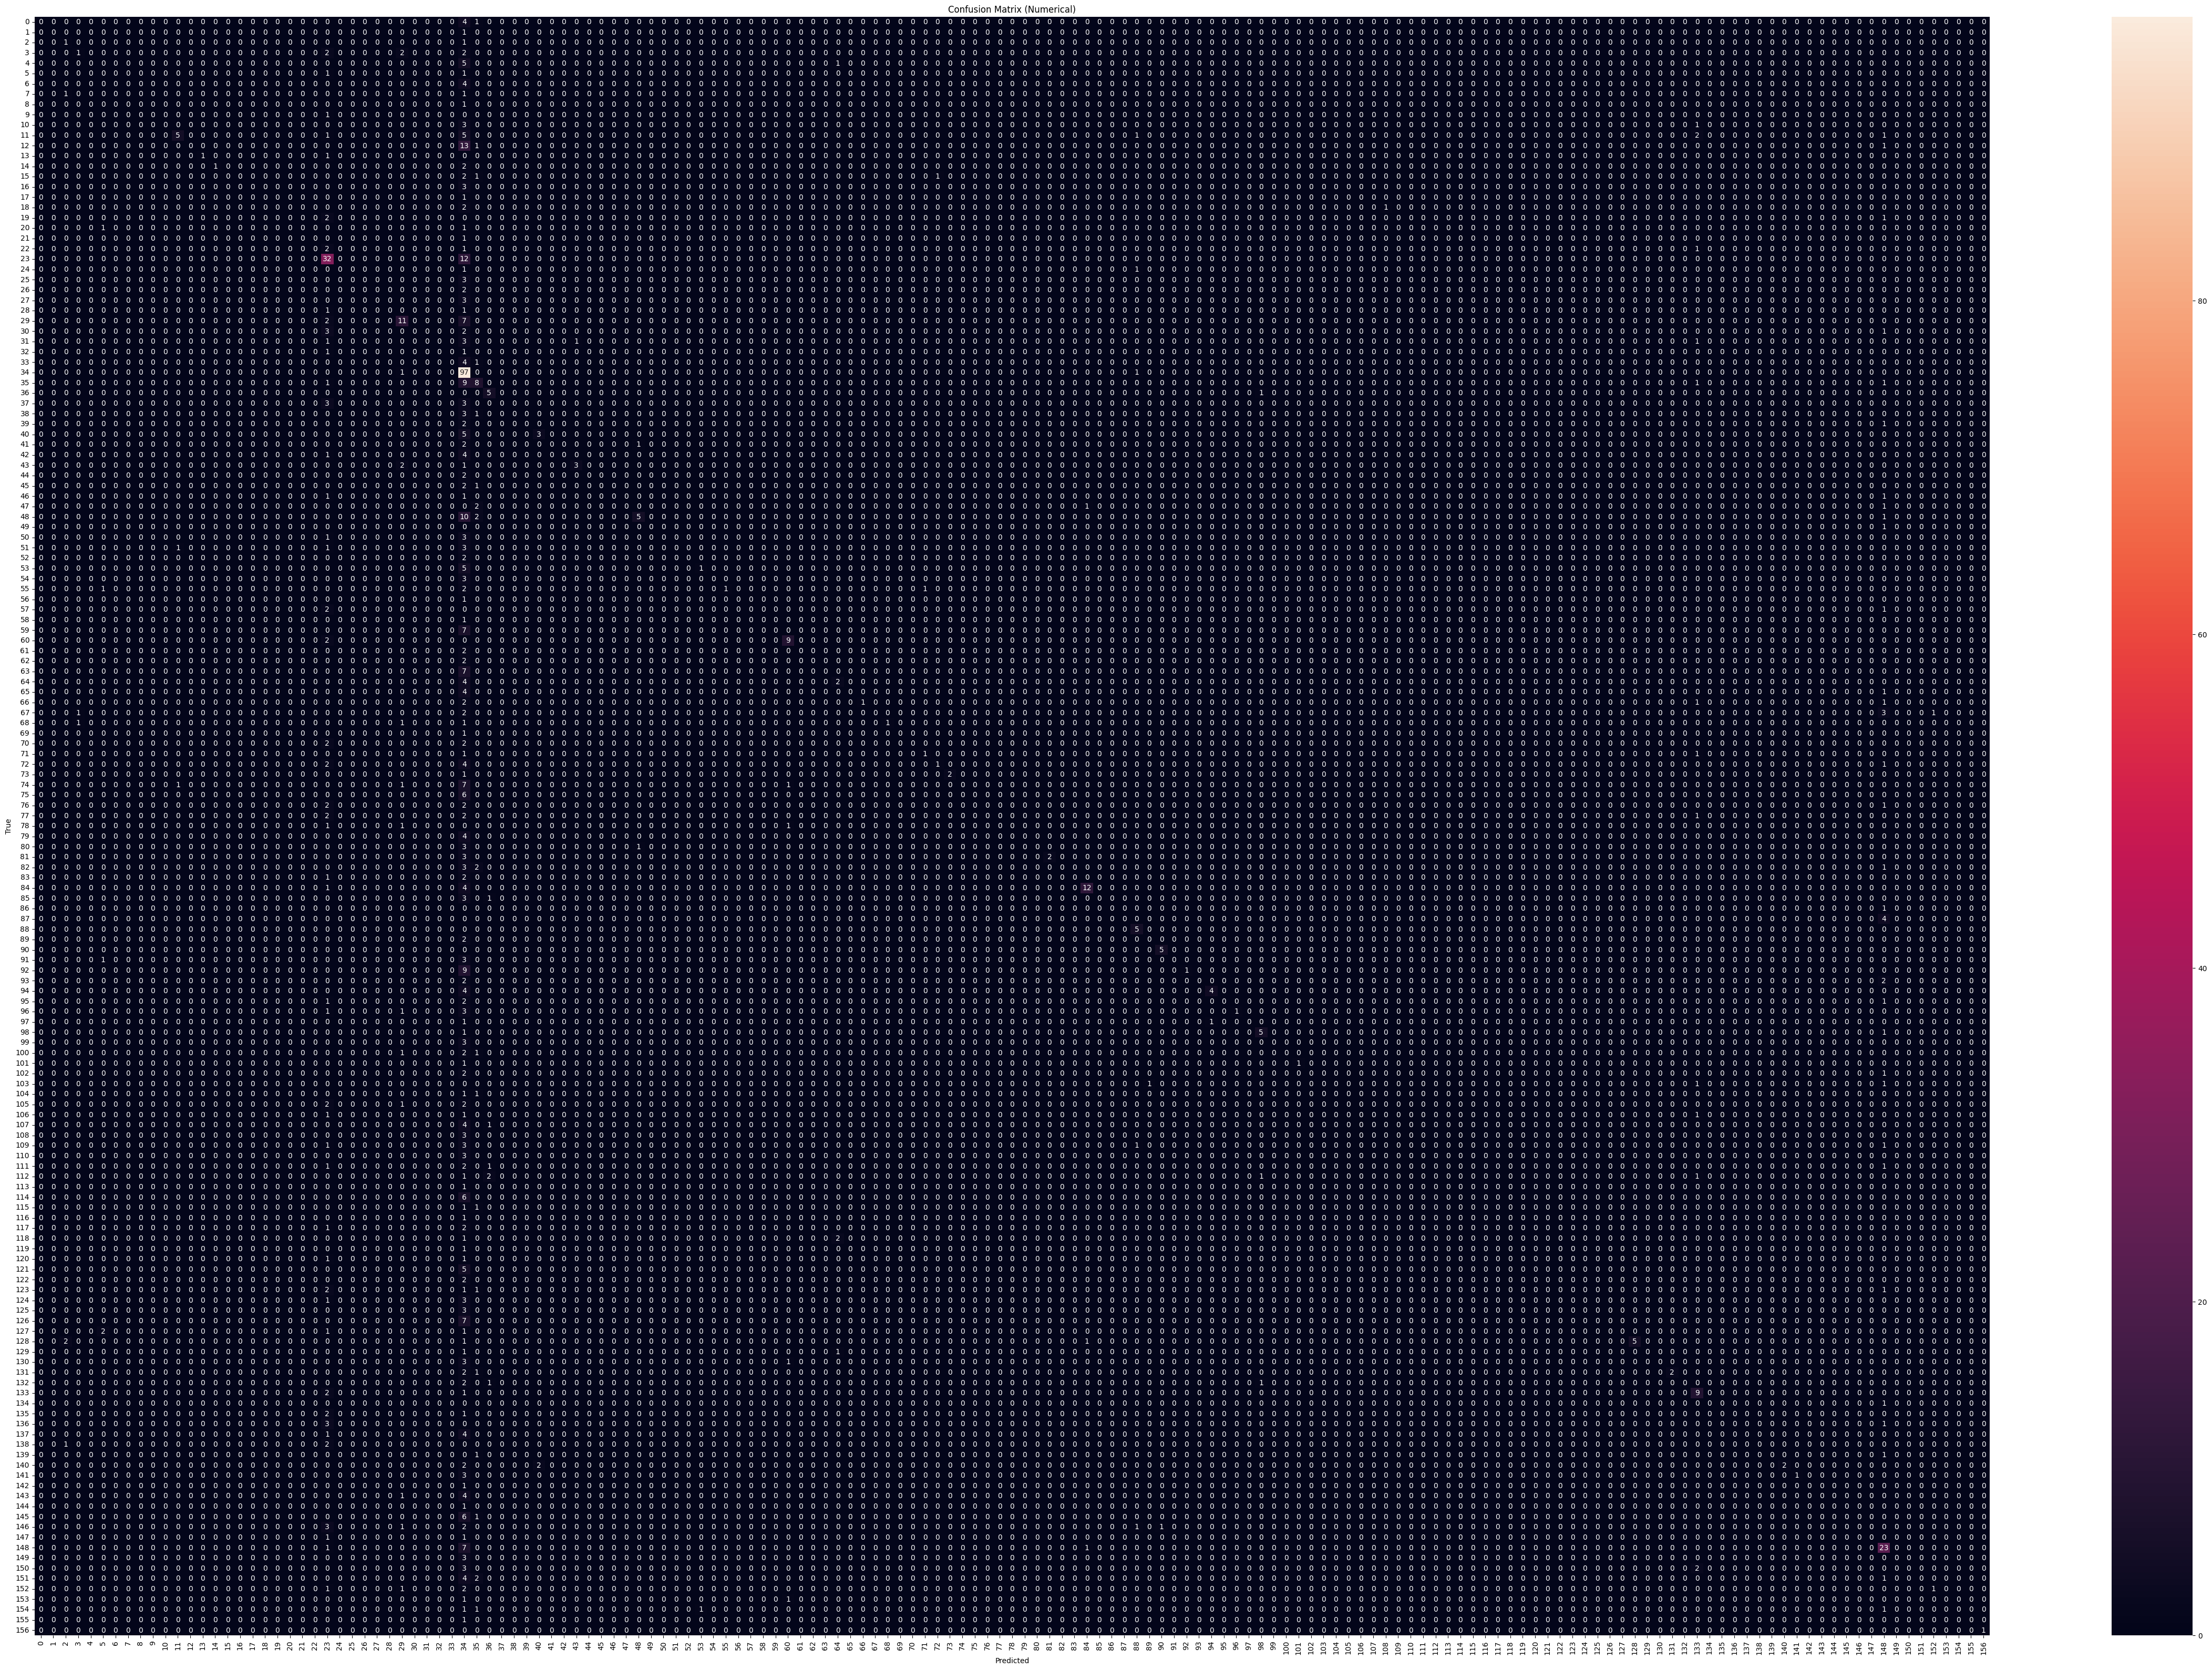

In [29]:
# prompt: buat visualize conffusion matrix number

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and y_pred from your model
cm = confusion_matrix(y_test, y_test_pred)

# Visualize the confusion matrix with numbers
plt.figure(figsize=(60, 40))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Numerical)")
plt.show()


In [30]:
# Show all target name of face
print(faces.target_names)

['Abdullah Gul' 'Adrien Brody' 'Alejandro Toledo' 'Alvaro Uribe'
 'Amelie Mauresmo' 'Andre Agassi' 'Andy Roddick' 'Angelina Jolie'
 'Ann Veneman' 'Anna Kournikova' 'Ari Fleischer' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Atal Bihari Vajpayee' 'Bill Clinton'
 'Bill Gates' 'Bill McBride' 'Bill Simon' 'Britney Spears' 'Carlos Menem'
 'Carlos Moya' 'Catherine Zeta-Jones' 'Charles Moose' 'Colin Powell'
 'Condoleezza Rice' 'David Beckham' 'David Nalbandian' 'Dick Cheney'
 'Dominique de Villepin' 'Donald Rumsfeld' 'Edmund Stoiber'
 'Eduardo Duhalde' 'Fidel Castro' 'George HW Bush' 'George Robertson'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Gonzalo Sanchez de Lozada' 'Gordon Brown' 'Gray Davis' 'Guillermo Coria'
 'Halle Berry' 'Hamid Karzai' 'Hans Blix' 'Harrison Ford'
 'Hillary Clinton' 'Howard Dean' 'Hu Jintao' 'Hugo Chavez' 'Ian Thorpe'
 'Igor Ivanov' 'Jack Straw' 'Jackie Chan' 'Jacques Chirac' 'Jacques Rogge'
 'James Blake' 'James Kelly' 'Jason Kidd' 'Javier Solana'

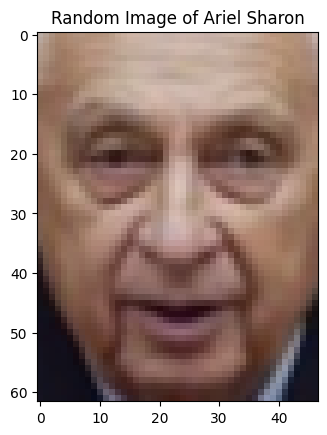

Predicted person: George W Bush


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random
# Assuming 'faces' is your loaded dataset and 'svm_model' is your trained SVM model

# Define the person's name
person_name = 'Ariel Sharon'

# Get all indices of images that belong to the specified person
person_index = np.where(faces.target_names == person_name)[0][0]  # Get the index of the person in target_names
person_image_indices = np.where(faces.target == person_index)[0]  # Get indices of all images for the person

# Select a random image index from the person's available images
random_image_index = random.choice(person_image_indices)

# Display the randomly selected image
plt.imshow(faces.images[random_image_index], cmap='gray')
plt.title(f"Random Image of {person_name}")
plt.show()

# Flatten the selected image (assuming the model was trained on flattened images)
selected_image_flattened = faces.images[random_image_index].flatten().reshape(1, -1)

# Predict using your trained SVM model
prediction = svm_model.predict(selected_image_flattened)

# Get the predicted person's name from the target_names array
predicted_person_name = faces.target_names[prediction[0]]

print(f"Predicted person: {predicted_person_name}")


# Percobaan 3 - Native SVM with Ekstraction Histogram

Native SVM Train Accuracy: 12.46%
Native SVM Test Accuracy: 11.45%

## Preparation

In [32]:
# Load required library
# Import Required Library
import numpy as np
import cv2
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data


In [33]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True) # Answer number 1 using min 10 face per label

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


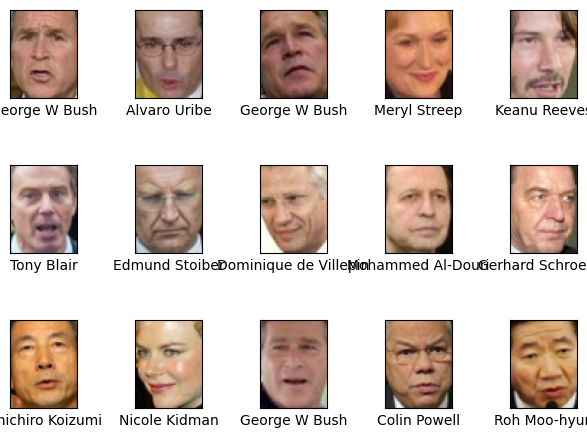

In [34]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

## Preprocessing

In [35]:
# Pada tahap ini, kita melakukan persiapan data sebelum dimasukkan ke dalam model.
X = faces.data # Variabel X merepresentasikan data fitur (pixel image yang sudah di flatten).
y = faces.target # Variabel y merepresentasikan label dari data, yang menunjukkan identitas orang pada masing-masing citra.

In [36]:
# Melihat dimensi atau ukuran dari array
X.shape

(4324, 8742)

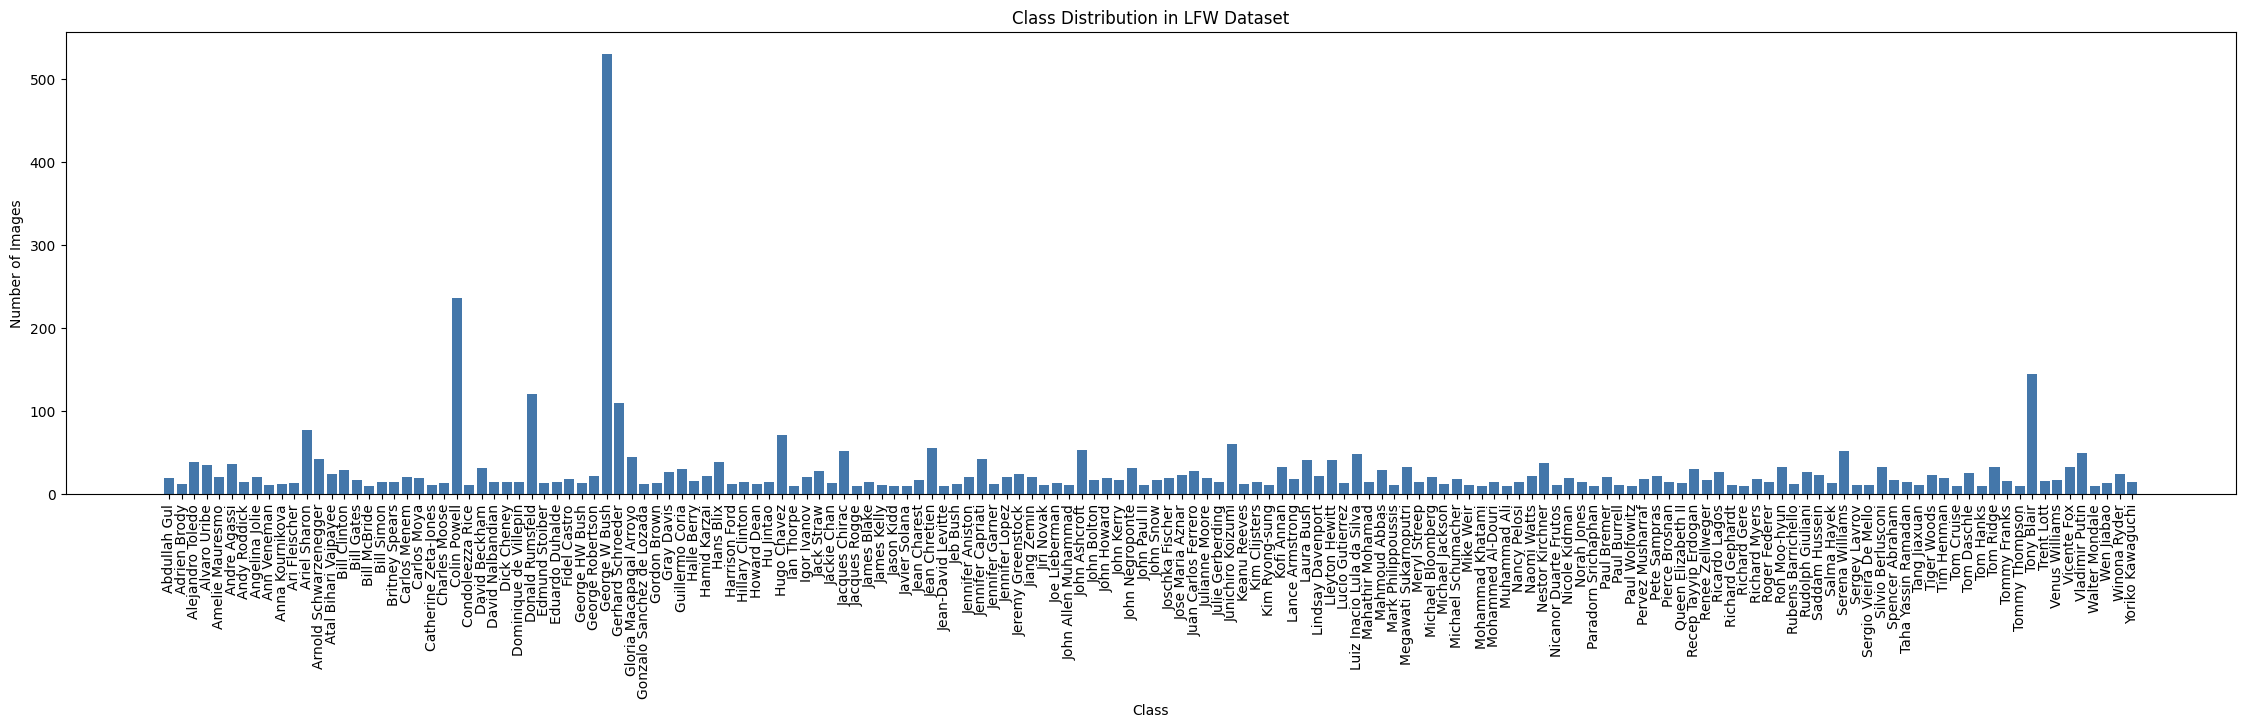

In [37]:
unique, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(28, 6))
plt.bar(faces.target_names[unique], counts, color='#4477AA')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in LFW Dataset')
plt.xticks(rotation=90)
plt.show()

## Features Extraction


In [38]:
# Function to calculate histogram for a single image
def extract_histogram(image):
    hist_r, _ = np.histogram(image[:, :, 0], bins=256, range=(0, 256), density=True)
    hist_g, _ = np.histogram(image[:, :, 1], bins=256, range=(0, 256), density=True)
    hist_b, _ = np.histogram(image[:, :, 2], bins=256, range=(0, 256), density=True)

    # Concatenate histograms for all channels
    hist = np.concatenate((hist_r.flatten(), hist_g.flatten(), hist_b.flatten()))

    return hist

# Function to extract features for multiple images
def extract_features(images):
    features = []

    for image in images:
        hist = extract_histogram(image)  # Use the extract_histogram function
        features.append(hist)

    return np.array(features)

In [39]:
# # Split data into training and testing sets 80% of training and 20% of testing
features = extract_features(faces.images)
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=42)

## Build Model


In [40]:
# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

## Evaluation


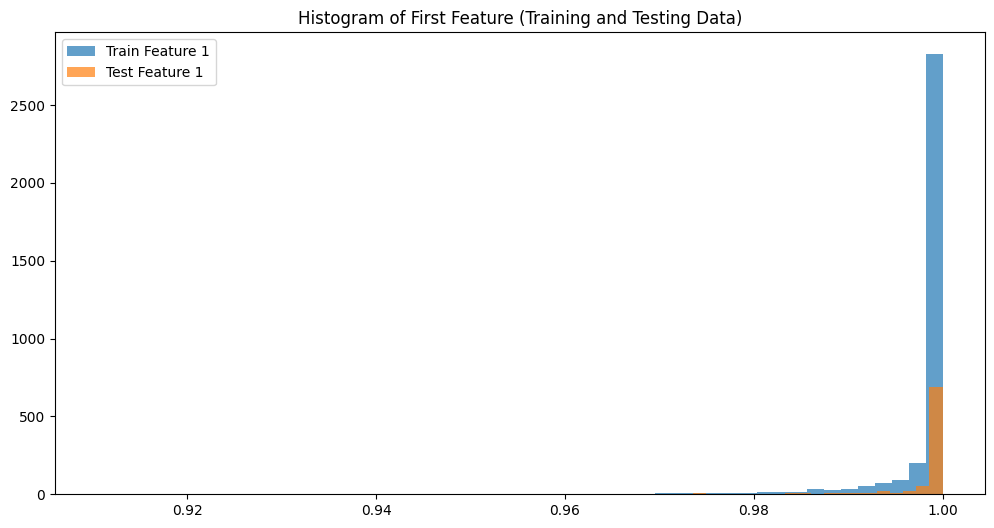

In [41]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.hist(X_train[:, 0], bins=50, alpha=0.7, label='Train Feature 1')
plt.hist(X_test[:, 0], bins=50, alpha=0.7, label='Test Feature 1')
plt.title('Histogram of First Feature (Training and Testing Data)')
plt.legend()
plt.show()



In [42]:
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)


native_svm_extract_train_accuracy = accuracy_score(y_train, y_train_pred)
native_svm_extract_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Native SVM Train Accuracy: {native_svm_extract_train_accuracy * 100:.2f}%')
print(f'Native SVM Test Accuracy: {native_svm_extract_test_accuracy * 100:.2f}%')

Native SVM Train Accuracy: 12.46%
Native SVM Test Accuracy: 11.45%


In [43]:
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred, target_names=faces.target_names))

Classification Report for Training Data:
                           precision    recall  f1-score   support

             Abdullah Gul       0.00      0.00      0.00        14
             Adrien Brody       0.00      0.00      0.00        11
         Alejandro Toledo       0.00      0.00      0.00        37
             Alvaro Uribe       0.00      0.00      0.00        28
          Amelie Mauresmo       0.00      0.00      0.00        15
             Andre Agassi       0.00      0.00      0.00        34
             Andy Roddick       0.00      0.00      0.00        11
           Angelina Jolie       0.00      0.00      0.00        18
              Ann Veneman       0.00      0.00      0.00        10
          Anna Kournikova       0.00      0.00      0.00        11
            Ari Fleischer       0.00      0.00      0.00         9
             Ariel Sharon       0.00      0.00      0.00        62
    Arnold Schwarzenegger       0.00      0.00      0.00        27
     Atal Bihari Vaj

C:\Users\M. Rofiq Aulia\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M. Rofiq Aulia\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M. Rofiq Aulia\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [44]:
print("Classification Report for Testing Data:")
print(classification_report(y_test, y_test_pred, target_names=faces.target_names[:len(np.unique(y_test))], zero_division=0))


Classification Report for Testing Data:
                           precision    recall  f1-score   support

             Abdullah Gul       0.00      0.00      0.00         5
             Adrien Brody       0.00      0.00      0.00         1
         Alejandro Toledo       0.00      0.00      0.00         2
             Alvaro Uribe       0.00      0.00      0.00         7
          Amelie Mauresmo       0.00      0.00      0.00         6
             Andre Agassi       0.00      0.00      0.00         2
             Andy Roddick       0.00      0.00      0.00         4
           Angelina Jolie       0.00      0.00      0.00         2
              Ann Veneman       0.00      0.00      0.00         1
          Anna Kournikova       0.00      0.00      0.00         1
            Ari Fleischer       0.00      0.00      0.00         4
             Ariel Sharon       0.00      0.00      0.00        15
    Arnold Schwarzenegger       0.00      0.00      0.00        15
     Atal Bihari Vajp

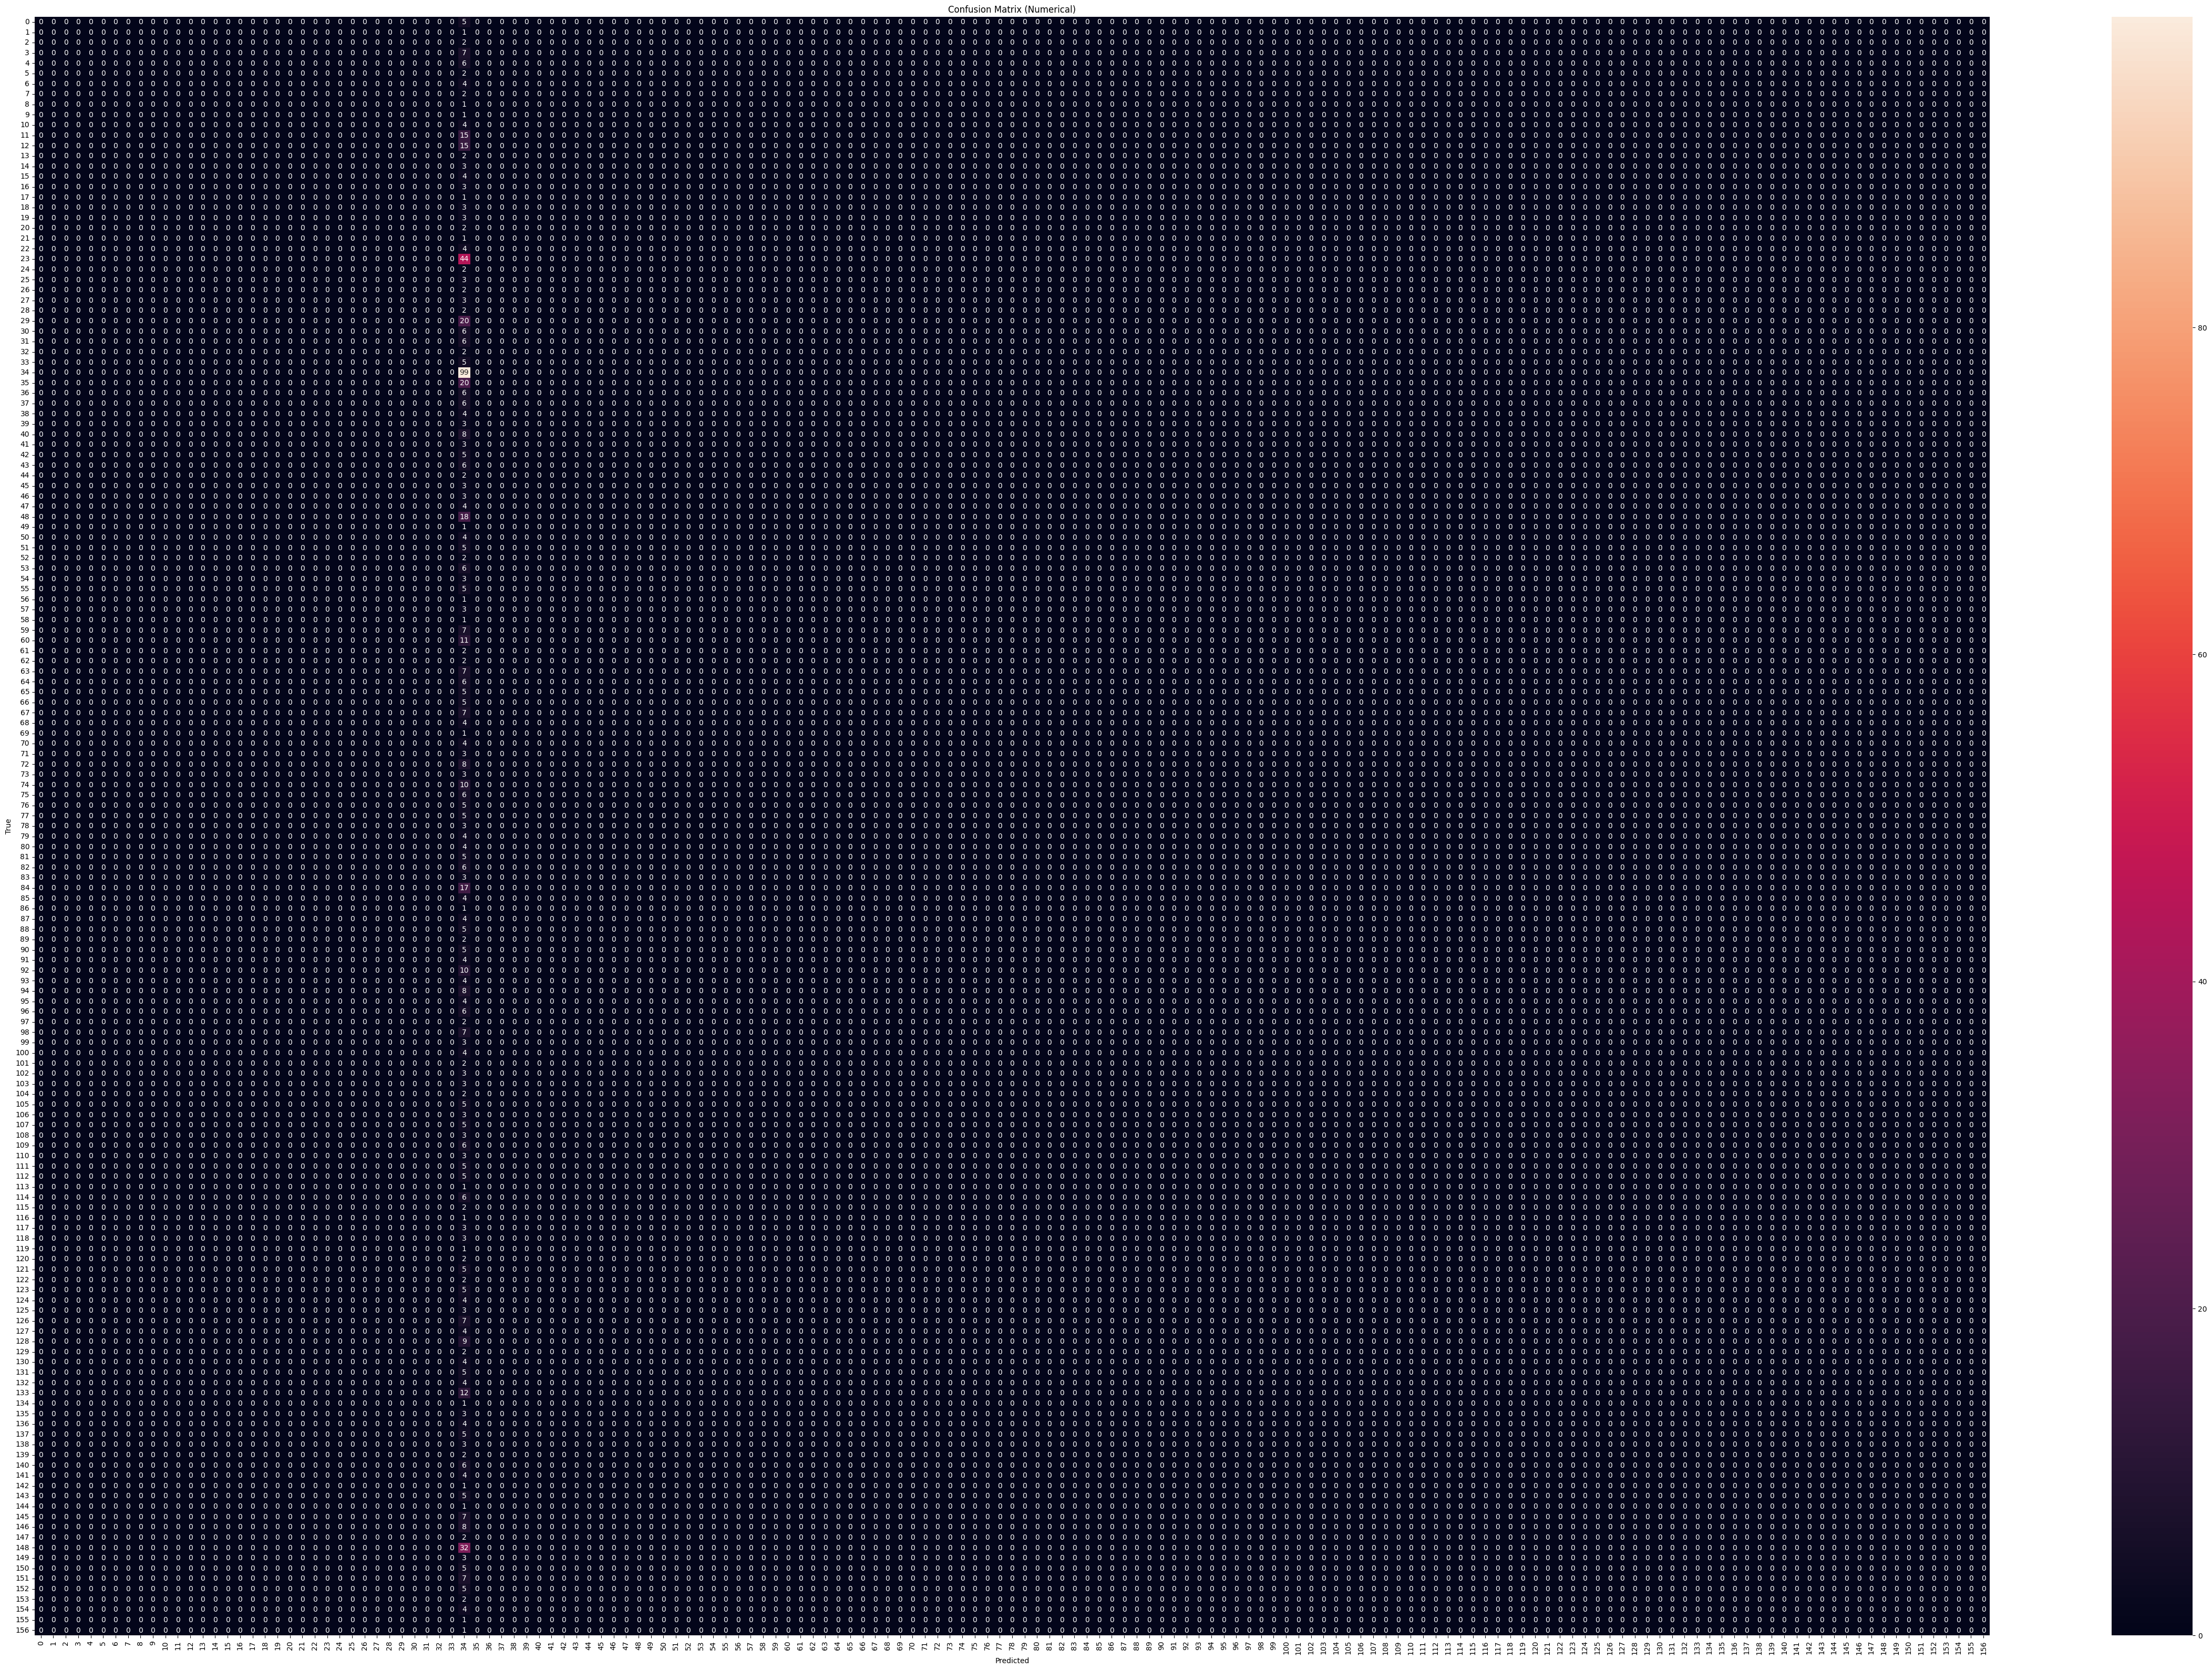

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and y_pred from your model
cm = confusion_matrix(y_test, y_test_pred)

# Visualize the confusion matrix with numbers
plt.figure(figsize=(60, 40))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Numerical)")
plt.show()


In [46]:
# Show all target name of face
print(faces.target_names)

['Abdullah Gul' 'Adrien Brody' 'Alejandro Toledo' 'Alvaro Uribe'
 'Amelie Mauresmo' 'Andre Agassi' 'Andy Roddick' 'Angelina Jolie'
 'Ann Veneman' 'Anna Kournikova' 'Ari Fleischer' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Atal Bihari Vajpayee' 'Bill Clinton'
 'Bill Gates' 'Bill McBride' 'Bill Simon' 'Britney Spears' 'Carlos Menem'
 'Carlos Moya' 'Catherine Zeta-Jones' 'Charles Moose' 'Colin Powell'
 'Condoleezza Rice' 'David Beckham' 'David Nalbandian' 'Dick Cheney'
 'Dominique de Villepin' 'Donald Rumsfeld' 'Edmund Stoiber'
 'Eduardo Duhalde' 'Fidel Castro' 'George HW Bush' 'George Robertson'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Gonzalo Sanchez de Lozada' 'Gordon Brown' 'Gray Davis' 'Guillermo Coria'
 'Halle Berry' 'Hamid Karzai' 'Hans Blix' 'Harrison Ford'
 'Hillary Clinton' 'Howard Dean' 'Hu Jintao' 'Hugo Chavez' 'Ian Thorpe'
 'Igor Ivanov' 'Jack Straw' 'Jackie Chan' 'Jacques Chirac' 'Jacques Rogge'
 'James Blake' 'James Kelly' 'Jason Kidd' 'Javier Solana'

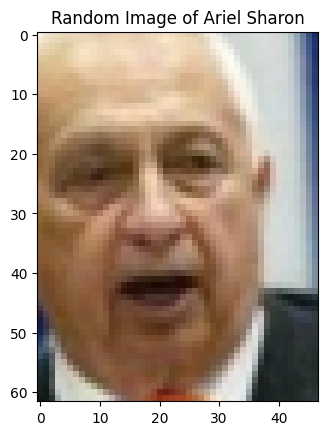

Predicted person: George W Bush


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import random
# Assuming 'faces' is your loaded dataset and 'svm_model' is your trained SVM model

# Define the person's name
person_name = 'Ariel Sharon'

# Get all indices of images that belong to the specified person
person_index = np.where(faces.target_names == person_name)[0][0]  # Get the index of the person in target_names
person_image_indices = np.where(faces.target == person_index)[0]  # Get indices of all images for the person

# Select a random image index from the person's available images
random_image_index = random.choice(person_image_indices)

# Display the randomly selected image
plt.imshow(faces.images[random_image_index], cmap='gray')
plt.title(f"Random Image of {person_name}")
plt.show()

# Extract histogram features for the selected image
selected_image_histogram = extract_histogram(faces.images[random_image_index])
selected_image_histogram = selected_image_histogram.reshape(1, -1)  # Reshape for prediction

# Predict using your trained SVM model
prediction = svm_model.predict(selected_image_histogram)

# Get the predicted person's name from the target_names array
predicted_person_name = faces.target_names[prediction[0]]

print(f"Predicted person: {predicted_person_name}")


# Percobaan 4 - SVM + PCA + GridSearch

Native SVM Train Accuracy: 12.46%
Native SVM Test Accuracy: 11.45%

## Preparation

In [48]:
# Load required library
# Import Required Library
import numpy as np
import cv2
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data


In [49]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True) # Answer number 1 using min 10 face per label

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


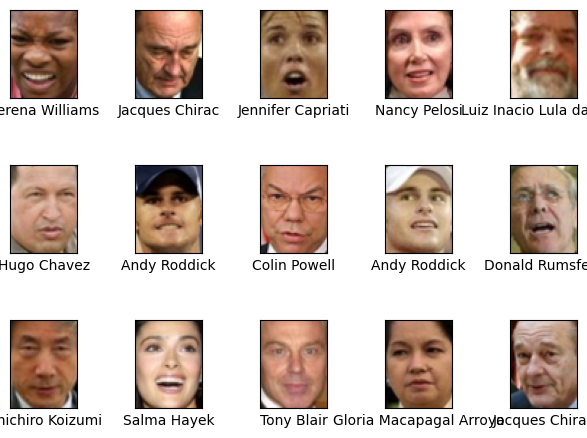

In [50]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

## Preprocessing

In [51]:
# Pada tahap ini, kita melakukan persiapan data sebelum dimasukkan ke dalam model.
X = faces.data # Variabel X merepresentasikan data fitur (pixel image yang sudah di flatten).
y = faces.target # Variabel y merepresentasikan label dari data, yang menunjukkan identitas orang pada masing-masing citra.

In [52]:
# Melihat dimensi atau ukuran dari array
X.shape

(4324, 8742)

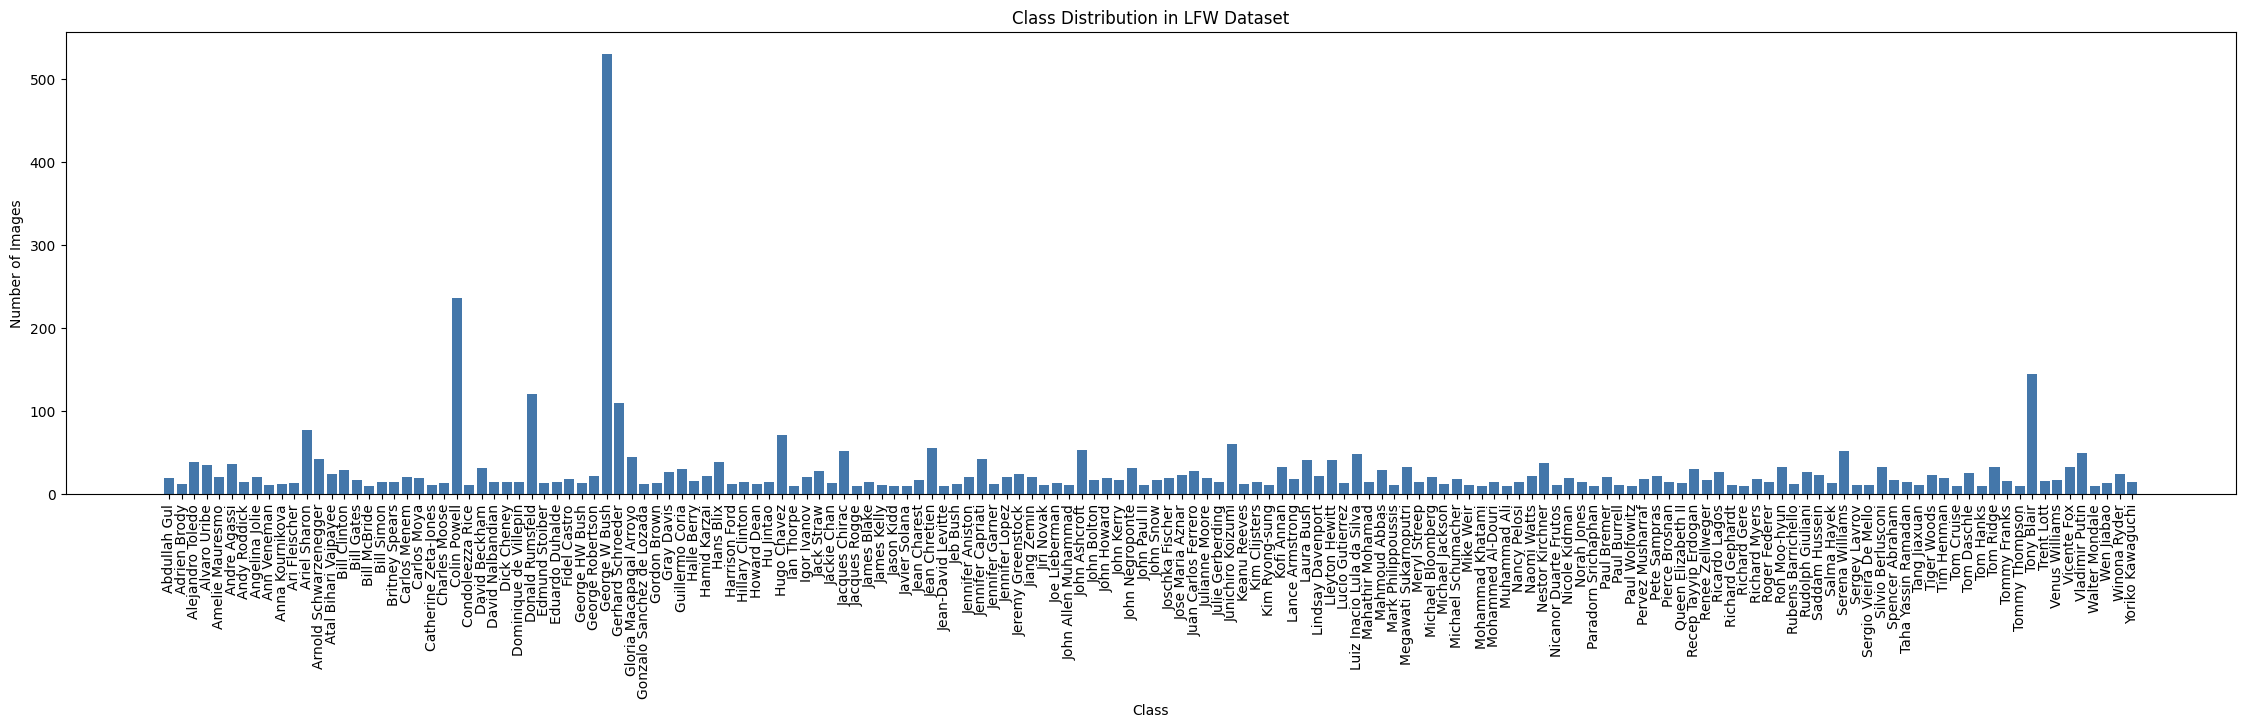

In [53]:
unique, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(28, 6))
plt.bar(faces.target_names[unique], counts, color='#4477AA')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in LFW Dataset')
plt.xticks(rotation=90)
plt.show()

## Features Extraction


In [54]:
# # Split data into training and testing sets 80% of training and 20% of testing
features = extract_features(faces.images)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Build Model


In [55]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [56]:
# Create a pipeline with StandardScaler, PCA, and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=150, whiten=True)),  # You can adjust n_components
    ('svm', SVC(kernel='rbf', class_weight='balanced'))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [100, 150, 200],  # Adjust the range of PCA components
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.001, 0.0001],
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator (model with best hyperparameters)
best_model = grid_search.best_estimator_

# Predict on training and testing data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)



Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [57]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [58]:
print("Best parameters found by grid search:")
print(grid_search.best_params_)
print("Best cross-validation score:")
print(grid_search.best_score_)


Best parameters found by grid search:
{'pca__n_components': 150, 'svm__C': 100, 'svm__gamma': 0.001}
Best cross-validation score:
0.5371422835297759


## Evaluation


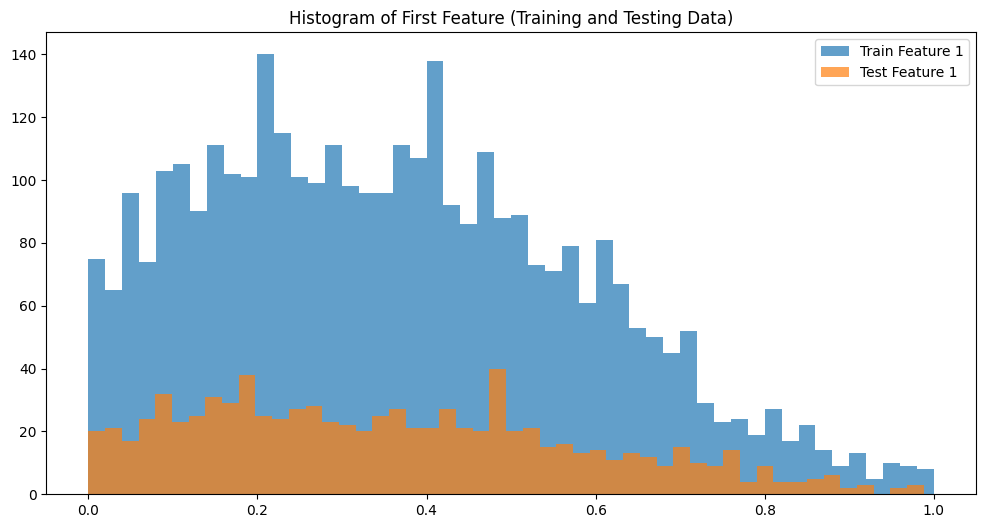

In [59]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.hist(X_train[:, 0], bins=50, alpha=0.7, label='Train Feature 1')
plt.hist(X_test[:, 0], bins=50, alpha=0.7, label='Test Feature 1')
plt.title('Histogram of First Feature (Training and Testing Data)')
plt.legend()
plt.show()



In [60]:
svm_pca_grid_train_accuracy = accuracy_score(y_train, y_train_pred)
svm_pca_grid_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Native SVM Train Accuracy: {svm_pca_grid_train_accuracy * 100:.2f}%')
print(f'Native SVM Test Accuracy: {svm_pca_grid_test_accuracy * 100:.2f}%')

Native SVM Train Accuracy: 99.51%
Native SVM Test Accuracy: 54.91%


In [61]:
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred, target_names=faces.target_names))

Classification Report for Training Data:
                           precision    recall  f1-score   support

             Abdullah Gul       1.00      1.00      1.00        14
             Adrien Brody       1.00      1.00      1.00        11
         Alejandro Toledo       1.00      1.00      1.00        37
             Alvaro Uribe       1.00      1.00      1.00        28
          Amelie Mauresmo       1.00      1.00      1.00        15
             Andre Agassi       1.00      1.00      1.00        34
             Andy Roddick       1.00      1.00      1.00        11
           Angelina Jolie       1.00      1.00      1.00        18
              Ann Veneman       1.00      1.00      1.00        10
          Anna Kournikova       1.00      1.00      1.00        11
            Ari Fleischer       1.00      1.00      1.00         9
             Ariel Sharon       0.98      1.00      0.99        62
    Arnold Schwarzenegger       1.00      1.00      1.00        27
     Atal Bihari Vaj

In [62]:
print("Classification Report for Testing Data:")
print(classification_report(y_test, y_test_pred, target_names=faces.target_names))

Classification Report for Testing Data:
                           precision    recall  f1-score   support

             Abdullah Gul       0.80      0.80      0.80         5
             Adrien Brody       0.00      0.00      0.00         1
         Alejandro Toledo       0.00      0.00      0.00         2
             Alvaro Uribe       0.67      0.57      0.62         7
          Amelie Mauresmo       1.00      0.83      0.91         6
             Andre Agassi       0.20      0.50      0.29         2
             Andy Roddick       0.50      0.25      0.33         4
           Angelina Jolie       0.00      0.00      0.00         2
              Ann Veneman       0.00      0.00      0.00         1
          Anna Kournikova       0.25      1.00      0.40         1
            Ari Fleischer       0.00      0.00      0.00         4
             Ariel Sharon       0.45      0.87      0.59        15
    Arnold Schwarzenegger       0.27      0.27      0.27        15
     Atal Bihari Vajp

C:\Users\M. Rofiq Aulia\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M. Rofiq Aulia\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M. Rofiq Aulia\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{met

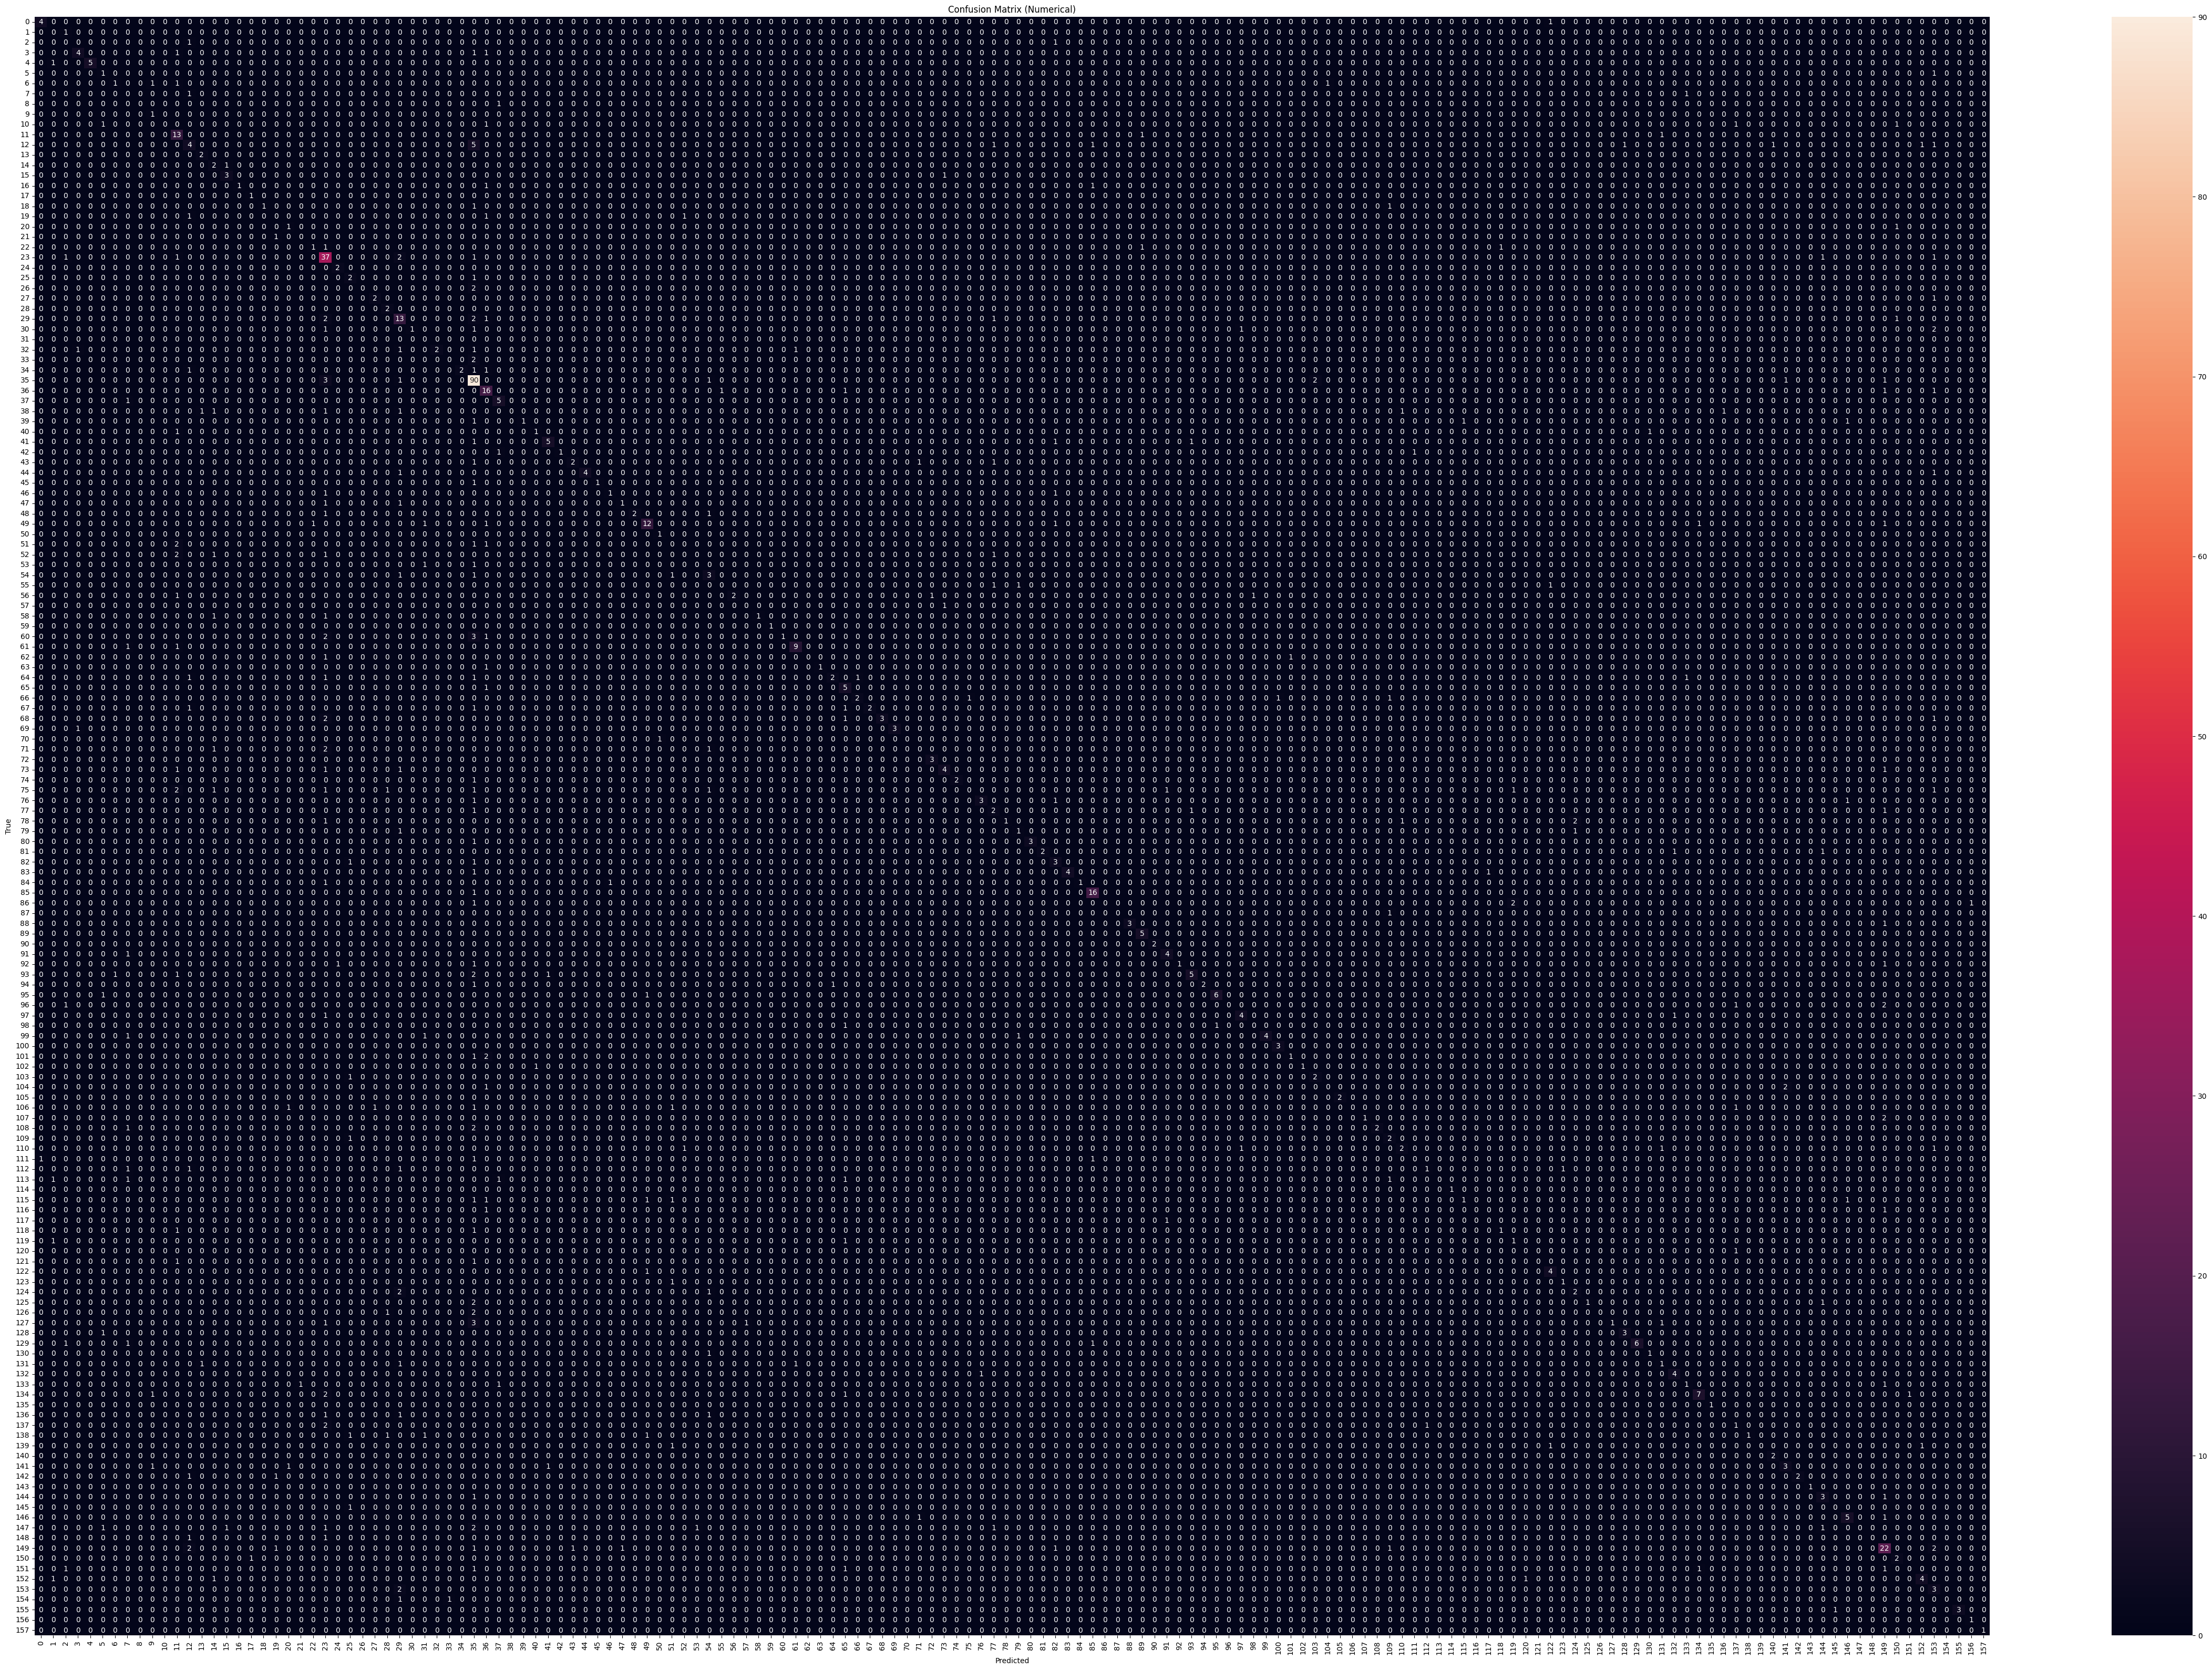

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and y_pred from your model
cm = confusion_matrix(y_test, y_test_pred)

# Visualize the confusion matrix with numbers
plt.figure(figsize=(60, 40))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Numerical)")
plt.show()

In [64]:
# Show all target name of face
print(faces.target_names)

['Abdullah Gul' 'Adrien Brody' 'Alejandro Toledo' 'Alvaro Uribe'
 'Amelie Mauresmo' 'Andre Agassi' 'Andy Roddick' 'Angelina Jolie'
 'Ann Veneman' 'Anna Kournikova' 'Ari Fleischer' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Atal Bihari Vajpayee' 'Bill Clinton'
 'Bill Gates' 'Bill McBride' 'Bill Simon' 'Britney Spears' 'Carlos Menem'
 'Carlos Moya' 'Catherine Zeta-Jones' 'Charles Moose' 'Colin Powell'
 'Condoleezza Rice' 'David Beckham' 'David Nalbandian' 'Dick Cheney'
 'Dominique de Villepin' 'Donald Rumsfeld' 'Edmund Stoiber'
 'Eduardo Duhalde' 'Fidel Castro' 'George HW Bush' 'George Robertson'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Gonzalo Sanchez de Lozada' 'Gordon Brown' 'Gray Davis' 'Guillermo Coria'
 'Halle Berry' 'Hamid Karzai' 'Hans Blix' 'Harrison Ford'
 'Hillary Clinton' 'Howard Dean' 'Hu Jintao' 'Hugo Chavez' 'Ian Thorpe'
 'Igor Ivanov' 'Jack Straw' 'Jackie Chan' 'Jacques Chirac' 'Jacques Rogge'
 'James Blake' 'James Kelly' 'Jason Kidd' 'Javier Solana'

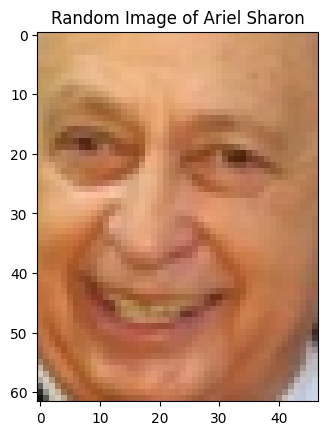

Predicted person: Ariel Sharon


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import random
# Assuming 'faces' is your loaded dataset and 'svm_model' is your trained SVM model

# Define the person's name
person_name = 'Ariel Sharon'

# Get all indices of images that belong to the specified person
person_index = np.where(faces.target_names == person_name)[0][0]  # Get the index of the person in target_names
person_image_indices = np.where(faces.target == person_index)[0]  # Get indices of all images for the person

# Select a random image index from the person's available images
random_image_index = random.choice(person_image_indices)

# Display the randomly selected image
plt.imshow(faces.images[random_image_index], cmap='gray')
plt.title(f"Random Image of {person_name}")
plt.show()

# Flatten the selected image (assuming the model was trained on flattened images)
selected_image_flattened = faces.images[random_image_index].flatten().reshape(1, -1)

# Predict using your trained SVM model
prediction = best_model.predict(selected_image_flattened)

# Get the predicted person's name from the target_names array
predicted_person_name = faces.target_names[prediction[0]]

print(f"Predicted person: {predicted_person_name}")


# Percobaan 5 - SVM with Ekstraction Hog + Sampling data


## Preparation

In [66]:
# Load required library
# Import Required Library
import numpy as np
import cv2
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data


In [67]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True) # Answer number 1 using min 10 face per label

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


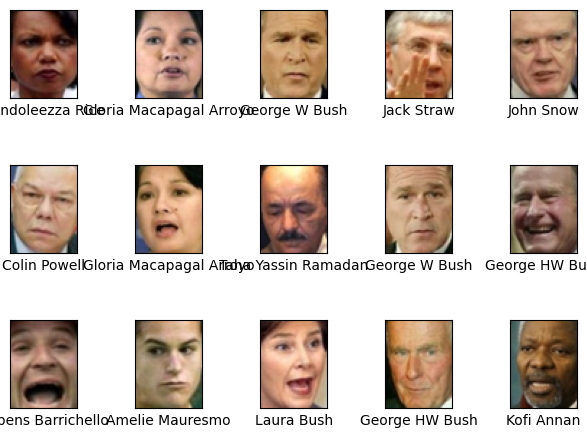

In [68]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

## Preprocessing

In [69]:
# Pada tahap ini, kita melakukan persiapan data sebelum dimasukkan ke dalam model.
X = faces.data # Variabel X merepresentasikan data fitur (pixel image yang sudah di flatten).
y = faces.target # Variabel y merepresentasikan label dari data, yang menunjukkan identitas orang pada masing-masing citra.

In [70]:
# Melihat dimensi atau ukuran dari array
X.shape

(4324, 8742)

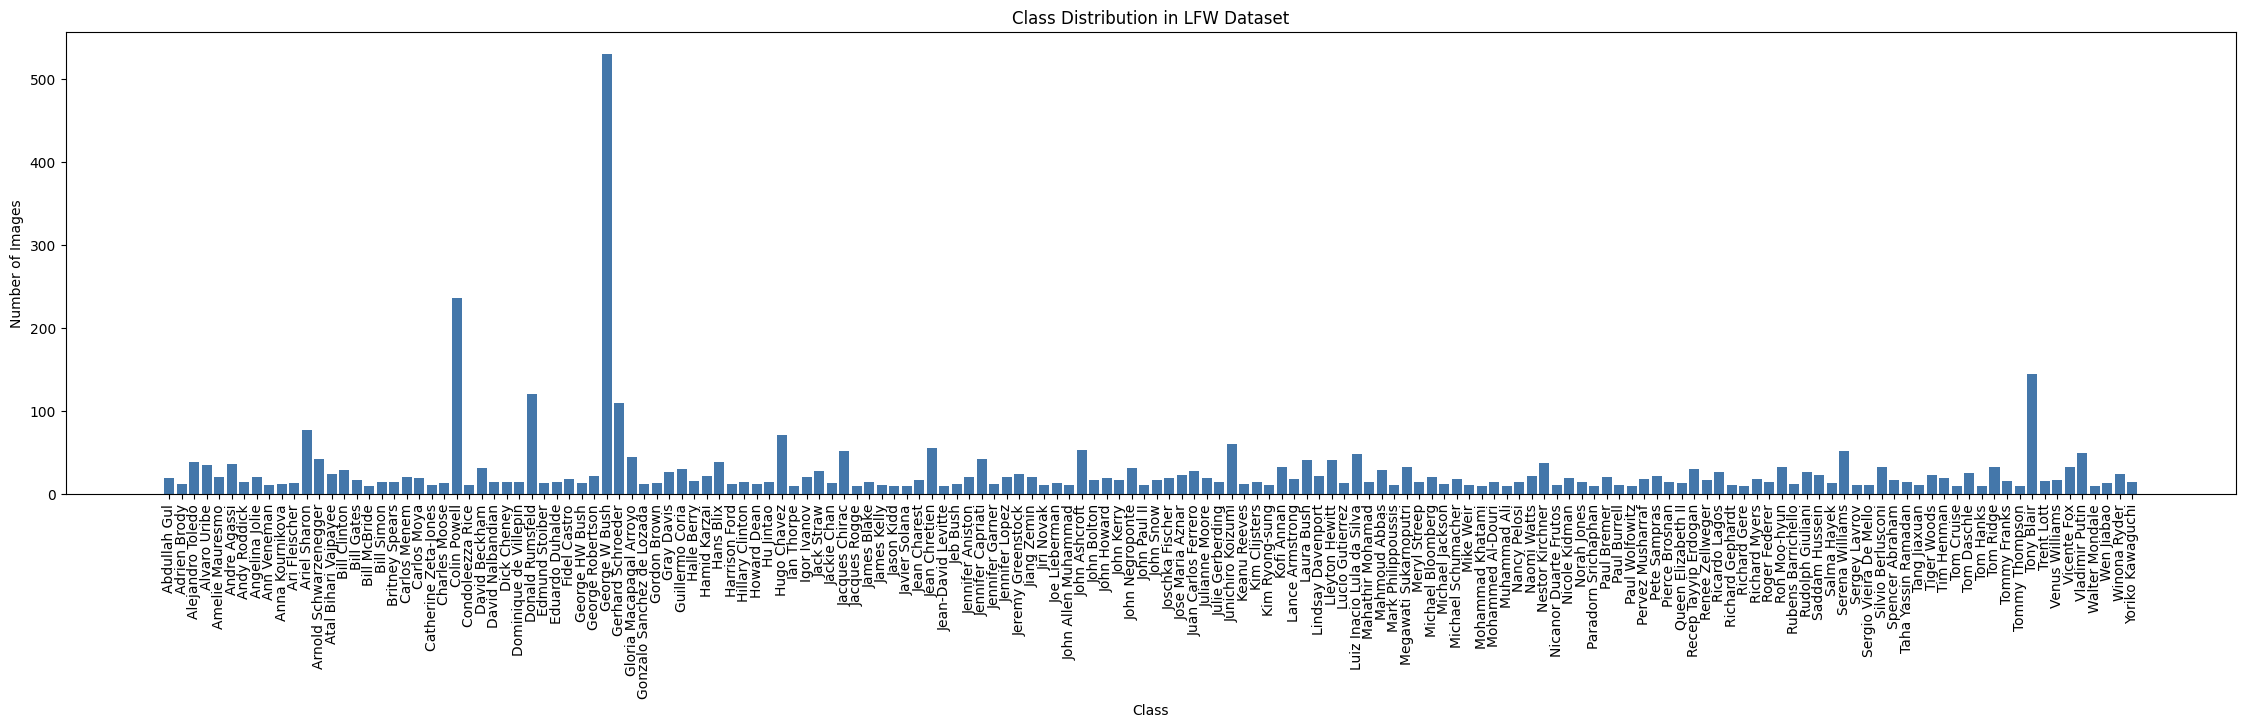

In [71]:
unique, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(28, 6))
plt.bar(faces.target_names[unique], counts, color='#4477AA')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in LFW Dataset')
plt.xticks(rotation=90)
plt.show()

In [72]:
from imblearn.over_sampling import SMOTE
from collections import Counter

ModuleNotFoundError: No module named 'imblearn'

In [237]:
initial_distribution = Counter(y)
print(f"Distribusi awal label: {initial_distribution}")

Distribusi awal label: Counter({35: 530, 23: 236, 149: 144, 29: 121, 36: 109, 11: 77, 49: 71, 85: 60, 61: 55, 73: 53, 54: 52, 134: 52, 153: 49, 95: 48, 37: 44, 65: 42, 12: 42, 91: 41, 93: 41, 44: 39, 2: 39, 110: 37, 5: 36, 3: 35, 137: 33, 99: 33, 146: 33, 152: 32, 89: 32, 129: 32, 77: 31, 25: 31, 122: 30, 41: 30, 14: 29, 97: 29, 52: 28, 82: 28, 124: 27, 131: 26, 40: 26, 144: 25, 13: 24, 156: 24, 68: 24, 81: 23, 141: 23, 132: 23, 92: 22, 34: 22, 119: 22, 43: 22, 109: 22, 4: 21, 19: 21, 67: 21, 64: 21, 7: 20, 69: 20, 115: 20, 51: 20, 101: 20, 0: 19, 83: 19, 80: 19, 112: 19, 142: 19, 75: 19, 20: 19, 127: 18, 103: 18, 90: 18, 118: 18, 32: 18, 76: 17, 138: 17, 151: 17, 79: 17, 123: 17, 60: 17, 15: 17, 74: 17, 42: 16, 147: 16, 150: 16, 106: 15, 17: 15, 28: 15, 6: 15, 139: 15, 100: 15, 48: 15, 84: 15, 120: 15, 113: 15, 108: 15, 56: 14, 157: 14, 128: 14, 26: 14, 46: 14, 27: 14, 96: 14, 18: 14, 87: 14, 31: 14, 39: 13, 33: 13, 30: 13, 121: 13, 71: 13, 10: 13, 94: 13, 133: 13, 155: 13, 53: 13, 22

In [238]:
min_samples = 100

smote = SMOTE(sampling_strategy={k: min_samples for k, v in initial_distribution.items() if v < min_samples}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [239]:
X_resampled.shape

(16440, 8742)

In [240]:
X_resampled = X_resampled.reshape(16440, 62, 47, 3)

In [241]:
resampled_distribution = Counter(y_resampled)
print(f"Distribusi label setelah SMOTE: {resampled_distribution}")

Distribusi label setelah SMOTE: Counter({35: 530, 23: 236, 149: 144, 29: 121, 36: 109, 54: 100, 0: 100, 134: 100, 153: 100, 56: 100, 137: 100, 157: 100, 106: 100, 17: 100, 37: 100, 28: 100, 76: 100, 11: 100, 92: 100, 3: 100, 21: 100, 6: 100, 81: 100, 57: 100, 13: 100, 156: 100, 128: 100, 117: 100, 131: 100, 125: 100, 91: 100, 59: 100, 86: 100, 26: 100, 34: 100, 65: 100, 85: 100, 88: 100, 77: 100, 138: 100, 124: 100, 63: 100, 152: 100, 70: 100, 95: 100, 5: 100, 46: 100, 25: 100, 127: 100, 111: 100, 102: 100, 42: 100, 61: 100, 154: 100, 4: 100, 14: 100, 119: 100, 49: 100, 47: 100, 68: 100, 139: 100, 103: 100, 100: 100, 151: 100, 72: 100, 89: 100, 19: 100, 66: 100, 110: 100, 99: 100, 93: 100, 146: 100, 39: 100, 79: 100, 38: 100, 33: 100, 50: 100, 73: 100, 12: 100, 145: 100, 122: 100, 123: 100, 45: 100, 147: 100, 129: 100, 60: 100, 41: 100, 43: 100, 44: 100, 52: 100, 83: 100, 109: 100, 141: 100, 144: 100, 24: 100, 48: 100, 80: 100, 126: 100, 30: 100, 121: 100, 7: 100, 97: 100, 40: 100, 27:

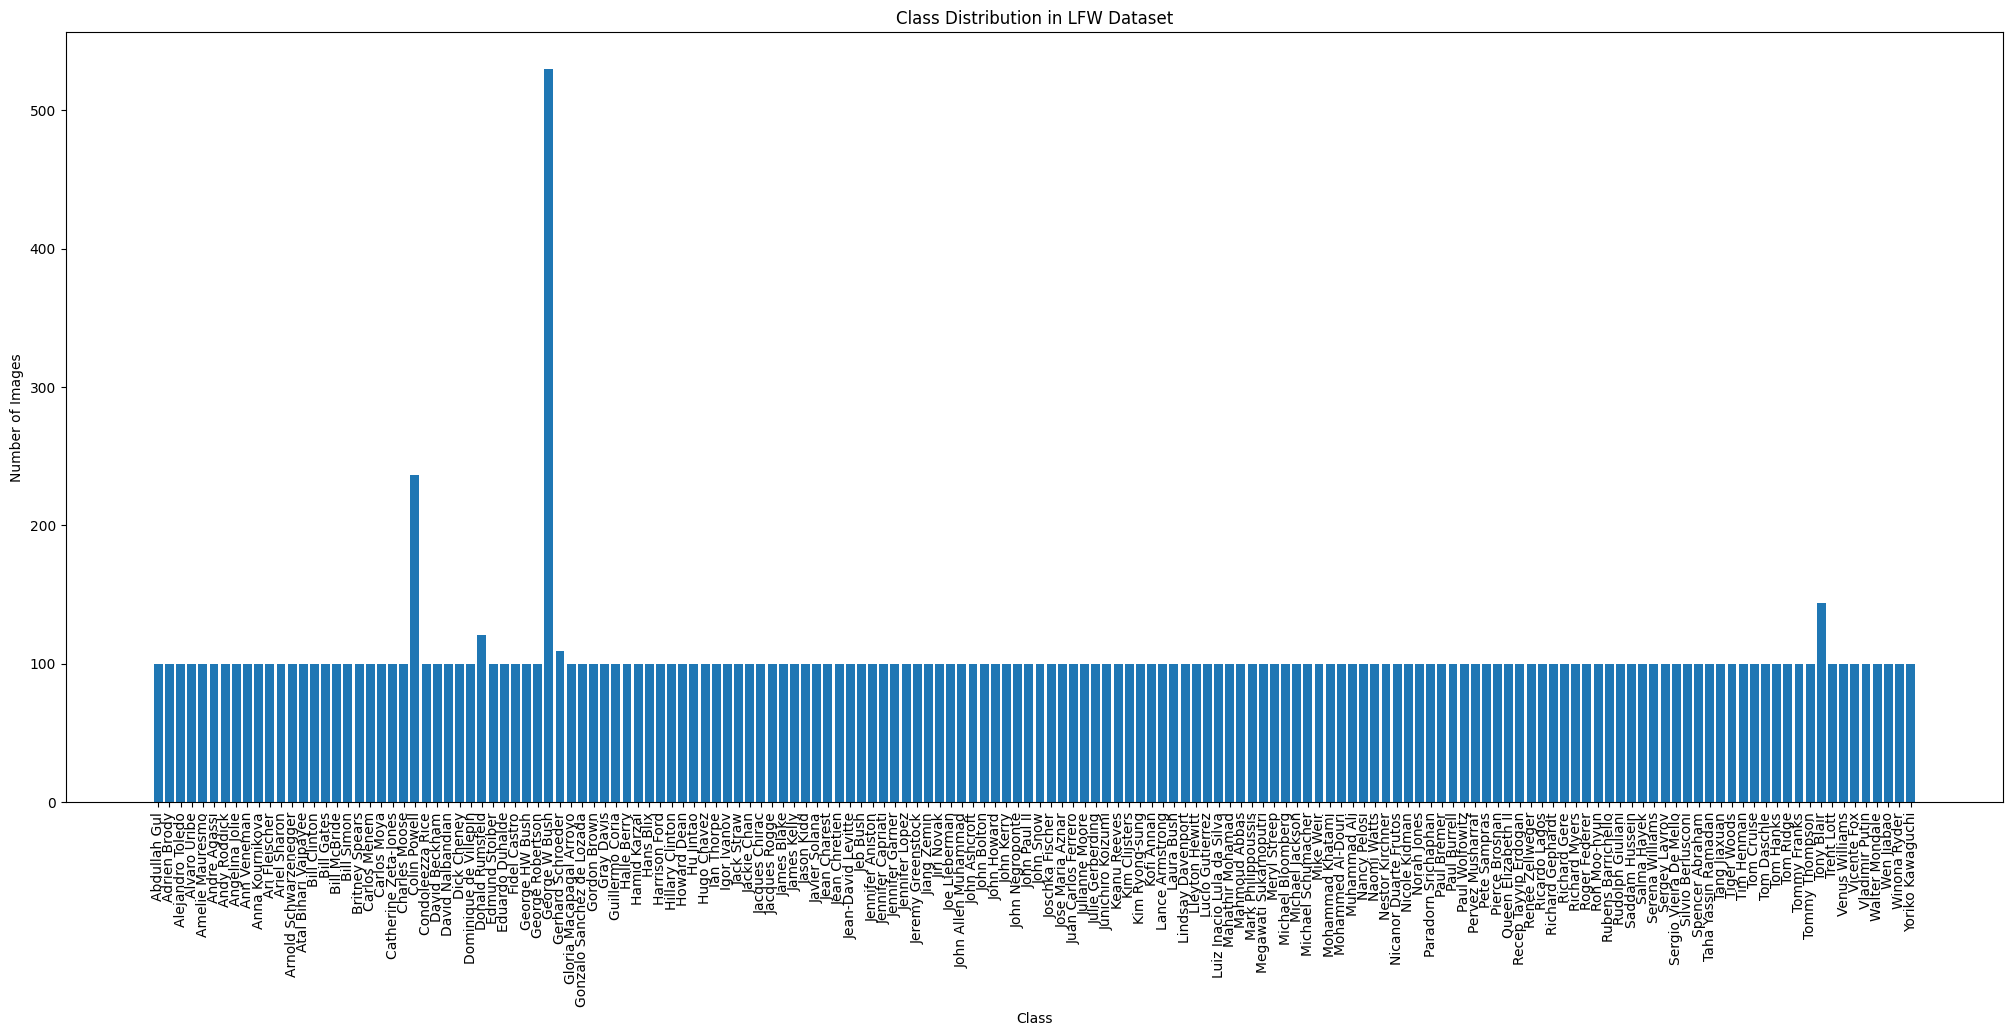

In [242]:
unique, counts = np.unique(y_resampled, return_counts=True)
plt.figure(figsize=(25, 10))
plt.bar(faces.target_names[unique], counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in LFW Dataset')
plt.xticks(rotation=90)
plt.show()

In [243]:
def cast_int8(image):
  return (image * 255).astype(np.uint8)

In [244]:
def preprocess(image_list):
  images = []

  for i, image in enumerate(image_list):
    image = cast_int8(image)

    images.append(image)

  return images

In [245]:
std_images = preprocess(X_resampled)

## Features Extraction


In [246]:
# rgb2gray and hog
import numpy as np
from skimage.color import rgb2gray
from skimage.feature import hog

def extract_histogram(image):
  hist_r, _ = np.histogram(image[:,:,0], bins=256, range=(0, 256), density=True)
  hist_g, _ = np.histogram(image[:,:,1], bins=256, range=(0, 256), density=True)
  hist_b, _ = np.histogram(image[:,:,2], bins=256, range=(0, 256), density=True)

  return hist_r, hist_g, hist_b
import numpy as np
def extract_hog_features(image):
    gray_image = rgb2gray(image)
    hog_feature, _ = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return hog_feature

def extract_features(images):
  features = []

  for image in images:
    hist_r, hist_g, hist_b = extract_histogram(image)

    hog = extract_hog_features(image)

    feature = np.concatenate([hist_r, hist_g, hist_b, hog])
    features.append(feature)

  return np.array(features)


In [247]:
# # Split data into training and testing sets 80% of training and 20% of testing
features = extract_features(std_images)
X_train, X_test, y_train, y_test = train_test_split(features, y_resampled, test_size=0.20, random_state=42)

## Build Model


In [248]:
# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

## Evaluation


In [249]:
y_train_pred = svm_model.predict(X_train)

acc_train = accuracy_score(y_train, y_train_pred) * 100

y_test_pred = svm_model.predict(X_test)

acc_test = accuracy_score(y_test, y_test_pred) * 100

print(f'Accuracy on train: {acc_train:.2f}%')
print(f'Accuracy on test: {acc_test:.2f}%')

Accuracy on train: 98.46%
Accuracy on test: 93.37%


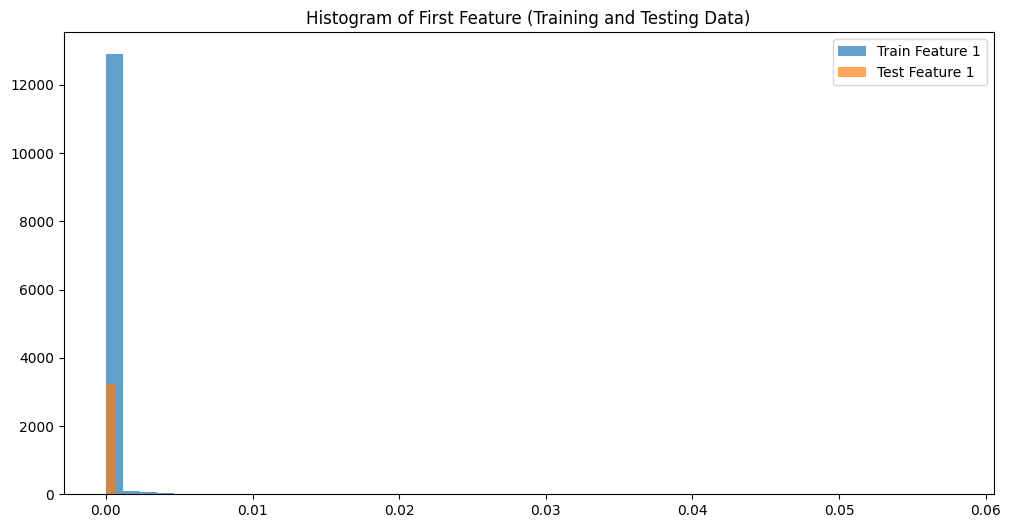

In [250]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.hist(X_train[:, 0], bins=50, alpha=0.7, label='Train Feature 1')
plt.hist(X_test[:, 0], bins=50, alpha=0.7, label='Test Feature 1')
plt.title('Histogram of First Feature (Training and Testing Data)')
plt.legend()
plt.show()



In [251]:
svm_hog_train_accuracy = accuracy_score(y_train, y_train_pred)
svm_hog_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'SVM Hog Train Accuracy: {svm_hog_train_accuracy * 100:.2f}%')
print(f'SVM Hog Test Accuracy: {svm_hog_test_accuracy * 100:.2f}%')

SVM Hog Train Accuracy: 98.46%
SVM Hog Test Accuracy: 93.37%


In [252]:
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred, target_names=faces.target_names))

Classification Report for Training Data:
                           precision    recall  f1-score   support

             Abdullah Gul       0.99      1.00      0.99        79
             Adrien Brody       1.00      1.00      1.00        84
         Alejandro Toledo       1.00      0.96      0.98        78
             Alvaro Uribe       1.00      0.97      0.99        80
          Amelie Mauresmo       1.00      1.00      1.00        84
             Andre Agassi       0.96      0.99      0.97        77
             Andy Roddick       1.00      0.99      0.99        81
           Angelina Jolie       1.00      1.00      1.00        76
              Ann Veneman       1.00      1.00      1.00        80
          Anna Kournikova       1.00      1.00      1.00        79
            Ari Fleischer       1.00      1.00      1.00        72
             Ariel Sharon       0.96      0.90      0.93        82
    Arnold Schwarzenegger       0.99      0.93      0.96        74
     Atal Bihari Vaj

In [253]:
print("Classification Report for Testing Data:")
print(classification_report(y_test, y_test_pred, target_names=faces.target_names[:len(np.unique(y_test))], zero_division=0))


Classification Report for Testing Data:
                           precision    recall  f1-score   support

             Abdullah Gul       0.95      1.00      0.98        21
             Adrien Brody       1.00      1.00      1.00        16
         Alejandro Toledo       0.95      0.95      0.95        22
             Alvaro Uribe       1.00      0.80      0.89        20
          Amelie Mauresmo       0.94      0.94      0.94        16
             Andre Agassi       0.91      0.87      0.89        23
             Andy Roddick       0.95      0.95      0.95        19
           Angelina Jolie       1.00      0.88      0.93        24
              Ann Veneman       1.00      1.00      1.00        20
          Anna Kournikova       1.00      1.00      1.00        21
            Ari Fleischer       1.00      0.86      0.92        28
             Ariel Sharon       0.94      0.94      0.94        18
    Arnold Schwarzenegger       0.92      0.85      0.88        26
     Atal Bihari Vajp

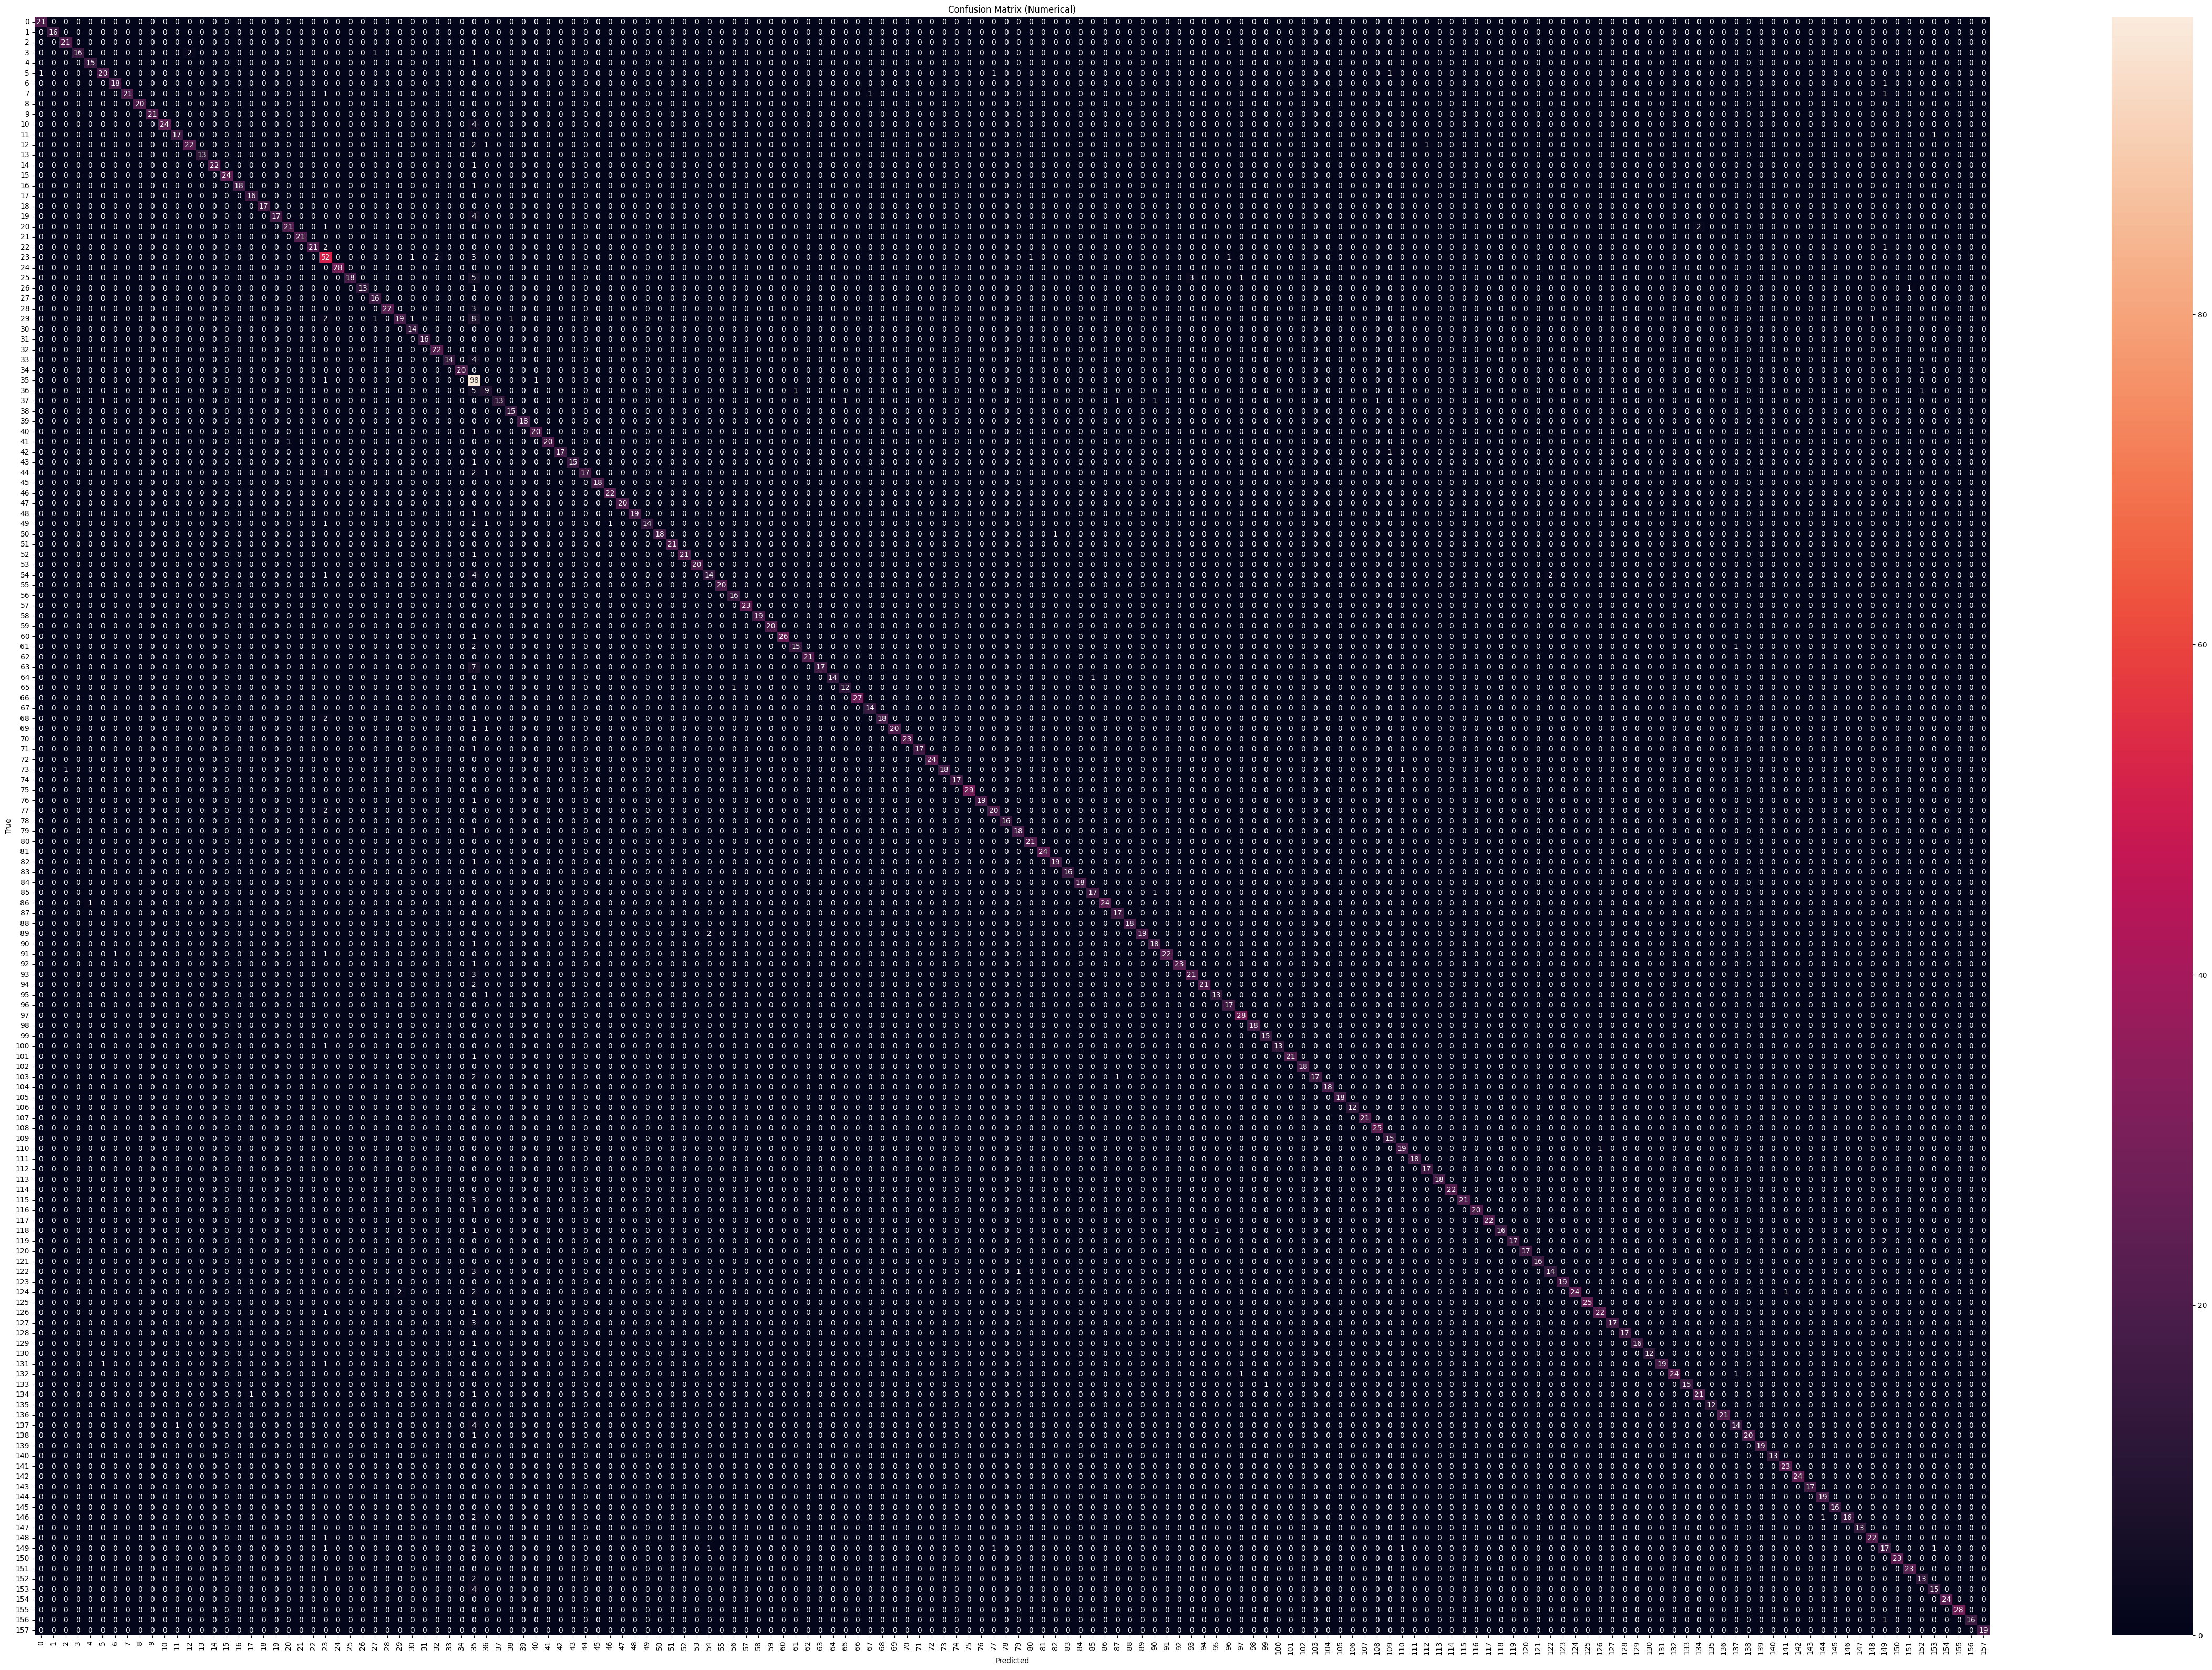

In [254]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and y_pred from your model
cm = confusion_matrix(y_test, y_test_pred)

# Visualize the confusion matrix with numbers
plt.figure(figsize=(60, 40))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Numerical)")
plt.show()


In [255]:
# Show all target name of face
print(faces.target_names)

['Abdullah Gul' 'Adrien Brody' 'Alejandro Toledo' 'Alvaro Uribe'
 'Amelie Mauresmo' 'Andre Agassi' 'Andy Roddick' 'Angelina Jolie'
 'Ann Veneman' 'Anna Kournikova' 'Ari Fleischer' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Atal Bihari Vajpayee' 'Bill Clinton'
 'Bill Gates' 'Bill McBride' 'Bill Simon' 'Britney Spears' 'Carlos Menem'
 'Carlos Moya' 'Catherine Zeta-Jones' 'Charles Moose' 'Colin Powell'
 'Condoleezza Rice' 'David Beckham' 'David Nalbandian' 'Dick Cheney'
 'Dominique de Villepin' 'Donald Rumsfeld' 'Edmund Stoiber'
 'Eduardo Duhalde' 'Fidel Castro' 'George HW Bush' 'George Robertson'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Gonzalo Sanchez de Lozada' 'Gordon Brown' 'Gray Davis' 'Guillermo Coria'
 'Halle Berry' 'Hamid Karzai' 'Hans Blix' 'Harrison Ford'
 'Hillary Clinton' 'Howard Dean' 'Hu Jintao' 'Hugo Chavez' 'Ian Thorpe'
 'Igor Ivanov' 'Jack Straw' 'Jackie Chan' 'Jacques Chirac' 'Jacques Rogge'
 'James Blake' 'James Kelly' 'Jason Kidd' 'Javier Solana'

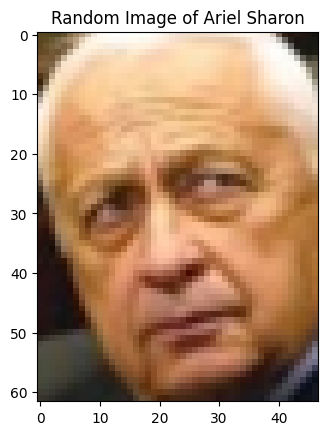

Predicted person: Ariel Sharon


In [262]:

import numpy as np
import matplotlib.pyplot as plt
import random
from skimage.transform import resize  # Import resize function
# Assuming 'faces' is your loaded dataset and 'svm_model' is your trained SVM model
# Define the person's name
person_name = 'Ariel Sharon'
# Get all indices of images that belong to the specified person
person_index = np.where(faces.target_names == person_name)[0][0]  # Get the index of the person in target_names
person_image_indices = np.where(faces.target == person_index)[0]  # Get indices of all images for the person

# Select a random image index from the person's available images
random_image_index = random.choice(person_image_indices)

# Display the randomly selected image
plt.imshow(faces.images[random_image_index], cmap='gray')
plt.title(f"Random Image of {person_name}")
plt.show()


# Flatten the selected image (assuming the model was trained on flattened images)
selected_image_flattened = faces.images[random_image_index].flatten().reshape(1, -1)

# Prediction using flattened image
prediction = best_model.predict(selected_image_flattened)

# Get the predicted person's name from the target_names array
predicted_person_name = faces.target_names[prediction[0]]

print(f"Predicted person: {predicted_person_name}")


# Report

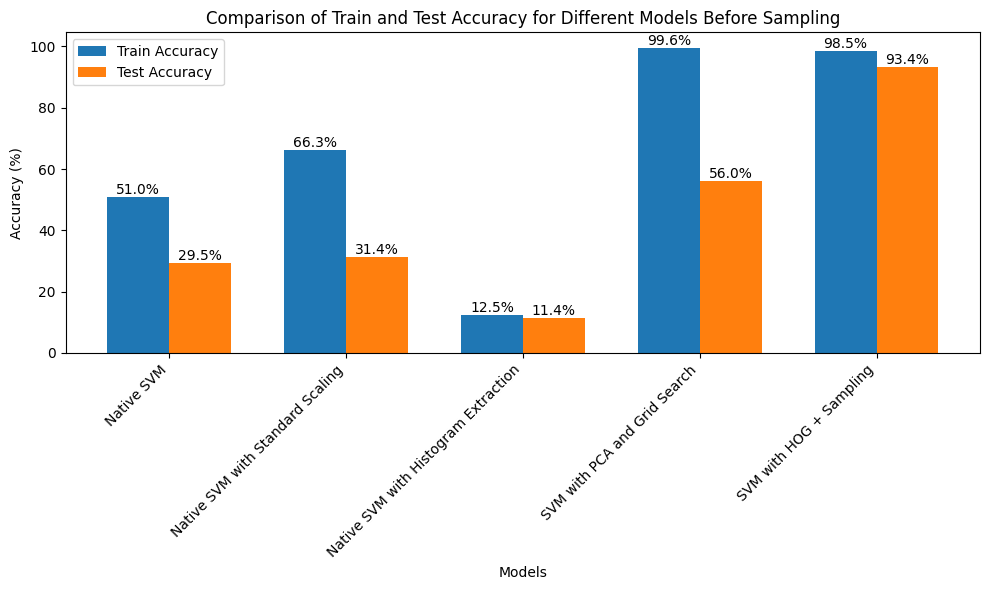

In [266]:
# Data for the bar chart (replace with your actual accuracy values)
models = [
    'Native SVM',
    'Native SVM with Standard Scaling',
    'Native SVM with Histogram Extraction',
    'SVM with PCA and Grid Search',
    'SVM with HOG + Sampling']
train_accuracies = [
    native_svm_train_accuracy * 100,
    native_svm_std_train_accuracy * 100,
    native_svm_extract_train_accuracy * 100,
    svm_pca_grid_train_accuracy * 100,
    svm_hog_train_accuracy * 100  # Placeholder or actual accuracy value
]
test_accuracies = [
    native_svm_test_accuracy * 100,
    native_svm_std_test_accuracy * 100,
    native_svm_extract_test_accuracy * 100,
    svm_pca_grid_test_accuracy * 100,
    svm_hog_test_accuracy * 100  # Placeholder or actual accuracy value
]

x = range(len(models))

# Create the bar chart
plt.figure(figsize=(10, 6))
width = 0.35
bars1 = plt.bar(x, train_accuracies, width, label='Train Accuracy')
bars2 = plt.bar([i + width for i in x], test_accuracies, width, label='Test Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Train and Test Accuracy for Different Models Before Sampling')
plt.xticks([i + width / 2 for i in x], models, rotation=45, ha='right')
plt.legend()

# Adding percentage labels above the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Kesimpulan

Berdasarkan hasil eksperimen yang dilakukan, dapat disimpulkan bahwa model SVM dengan kombinasi HOG features dan SMOTE untuk menangani ketidakseimbangan data memberikan akurasi yang lebih baik dibandingkan dengan model SVM dasar atau dengan pendekatan lainnya seperti PCA dan Grid Search. Penggunaan HOG features dalam ekstraksi fitur terbukti efektif dalam menangkap informasi penting dari wajah yang dapat digunakan untuk klasifikasi. Selain itu, penerapan SMOTE untuk mengatasi ketidakseimbangan data mampu meningkatkan performa model dengan menghasilkan data sintetis untuk kelas minoritas. Secara keseluruhan, model SVM dengan HOG dan SMOTE merupakan pilihan yang baik untuk masalah pengenalan wajah pada dataset LFW, menghasilkan peningkatan akurasi baik pada data pelatihan maupun pengujian.